<a href="https://colab.research.google.com/github/Amanverma783/Credit_card_default_prediction/blob/main/Credit_card_defualt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card defualt Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **By Aman Verma**


# **Project Summary -**

premium_photo-1680792152173-42a4572e3377.avif

The Credit Card Default Prediction project aims to develop an accurate and reliable predictive model that assesses the likelihood of credit card holders defaulting on their payments. This predictive model utilizes historical credit card transaction data, customer information, and various financial indicators to classify customers as either "likely to default" or "unlikely to default." By identifying high-risk customers in advance, financial institutions can take proactive measures to minimize potential losses and manage credit risk effectively.

To begin the project, I performed data visualization to gain insights into the dataset. I discovered several important features that were strongly related to defaulters. Additionally, I conducted feature engineering by creating a new feature that represented the average bill amount over the past six months. This helped capture the historical payment behavior of customers.

One significant challenge I encountered was the heavily imbalanced nature of the dataset, with a majority of non-defaulting cases. To address this issue, I applied the Synthetic Minority Over-sampling Technique (SMOTE) to balance the data. This technique generated synthetic samples of the minority class (defaulters) to create a more balanced dataset for training the models.

I developed four different models for credit card payment default prediction: Logistic Regression, Random Forest, Support Vector Machine (SVM), and XGBoost Classifier. My evaluation metrics focused on recall, f1 score, and KS statistic, which are essential for the business objective of accurately identifying defaulters.

# **GitHub Link -**

https://github.com/Amanverma783/Credit_card_default_prediction

# **Problem Statement**


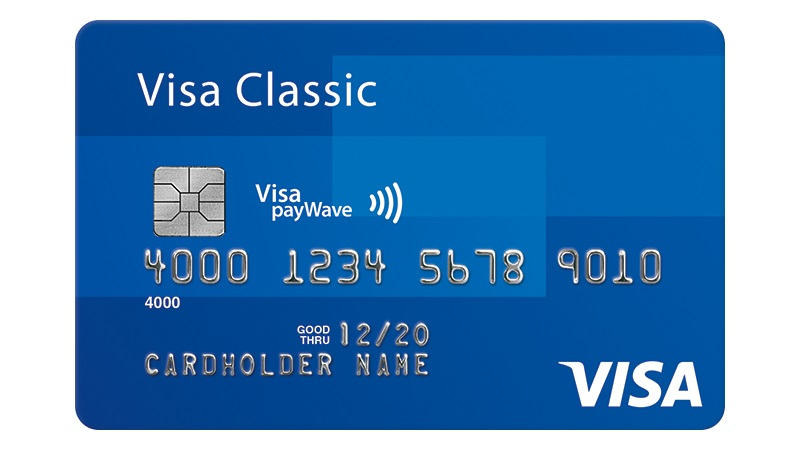

**Write Problem Statement Here.**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

Business Objective:The goal is to predict the likelihood of customers defaulting on their credit card payments in Taiwan. This prediction is essential for risk management purposes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer

# Importing libraries for modelling and evaluation
from pandas.plotting import parallel_coordinates

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split#For train and test dataset splitting
from imblearn.over_sampling import SMOTE #for oversampling in case of class imbalance
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("/content/default of credit card clients.csv", header = 1)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

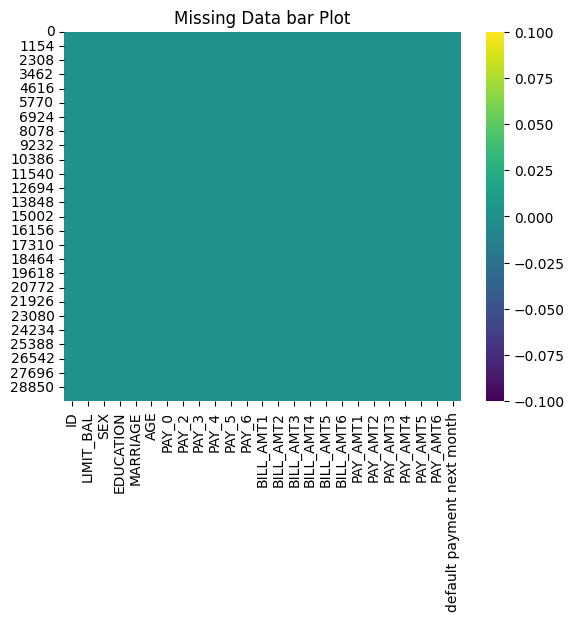

In [8]:
# Visualizing the missing values
sns.heatmap(df.isna(),cmap="viridis")

plt.title('Missing Data bar Plot')
plt.show()

### What did you know about your dataset?

Answer Here

In this dataset we have 30,000 rows and 25 columns. I observed that there are no duplicate values and misssing values/null values in the dataset. There are 24 Independent features and Default payment next month is the target variable. All independent features are of Int data type. There are categorical variables like Sex, Education and Marriage. Remaining all independent variables are Numerical.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

Answer Here

**EDUCATION:**
1=graduate school,
2=university,
3=high school,
0, 4, 5, 6=others)

**MARRIAGE:** Marital status
1=married,
2=single,
3=divorce,
0=others

**AGE:** Age in years

**History of Past Payments**

**PAY_0:** Repayment status in September, 2005

**-2:** No consumption
**-1:** Paid in full
*0:** The use of revolving credit
**1** = payment delay for one month
**2** = payment delay for two months
**8** = payment delay for eight months
**9** = payment delay for nine months and above.

**PAY_2:** Repayment status in August, 2005 (scale same as above)

**PAY_3:** Repayment status in July, 2005 (scale same as above)

**PAY_4:** Repayment status in June, 2005 (scale same as above)

**PAY_5:** Repayment status in May, 2005 (scale same as above)

**PAY_6:** Repayment status in April, 2005 (scale same as above)

**Amount of bill Statement**

**BILL_AMT1:** Amount of bill statement in September, 2005

**BILL_AMT2:** Amount of bill statement in August, 2005

**BILL_AMT3:** Amount of bill statement in July, 2005

**BILL_AMT4:** Amount of bill statement in June, 2005

**BILL_AMT5:** Amount of bill statement in May, 2005

**BILL_AMT6:** Amount of bill statement in April, 2005

**Amount of Previous Payments -Previous amount Paid**

**PAY_AMT1:** Amount of previous payment in September, 2005

**PAY_AMT2:** Amount of previous payment in August, 2005

**PAY_AMT3:** Amount of previous payment in July, 2005

**PAY_AMT4:** Amount of previous payment in June, 2005

**PAY_AMT5:** Amount of previous payment in May, 2005

**PAY_AMT6:** Amount of previous payment in April, 2005

default payment next month: Default payment

1=yes


0=no

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print('unique values in ',i, 'are', df[i].nunique())


unique values in  ID are 30000
unique values in  LIMIT_BAL are 81
unique values in  SEX are 2
unique values in  EDUCATION are 7
unique values in  MARRIAGE are 4
unique values in  AGE are 56
unique values in  PAY_0 are 11
unique values in  PAY_2 are 11
unique values in  PAY_3 are 11
unique values in  PAY_4 are 11
unique values in  PAY_5 are 10
unique values in  PAY_6 are 10
unique values in  BILL_AMT1 are 22723
unique values in  BILL_AMT2 are 22346
unique values in  BILL_AMT3 are 22026
unique values in  BILL_AMT4 are 21548
unique values in  BILL_AMT5 are 21010
unique values in  BILL_AMT6 are 20604
unique values in  PAY_AMT1 are 7943
unique values in  PAY_AMT2 are 7899
unique values in  PAY_AMT3 are 7518
unique values in  PAY_AMT4 are 6937
unique values in  PAY_AMT5 are 6897
unique values in  PAY_AMT6 are 6939
unique values in  default payment next month are 2


In [12]:
categorical=['SEX','EDUCATION','MARRIAGE']

In [13]:
for i in categorical:
  print('unique values in ',i, 'are', df[i].unique())

unique values in  SEX are [2 1]
unique values in  EDUCATION are [2 1 3 5 4 6 0]
unique values in  MARRIAGE are [1 2 3 0]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# making copy of our dataset

df_copy=df.copy()

df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
#renaming of columns for better understanding in visualization
df_copy.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df_copy.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df_copy.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df_copy.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [16]:
# after renaming
df_copy.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [17]:
# Replace values in SEX, MARRIAGE and EDUCATION variables, refering the dataset description for better visualization and understanding.
df_copy['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})
df_copy['EDUCATION'] = df['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_copy['MARRIAGE'] = df['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})
df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
df_copy.shape

(30000, 25)

### What all manipulations have you done and insights you found?

Answer Here.

I made a copy for my original dataset and change my column names to the names that are easy to intrepret. I also changed the values of columns sex, marriage and education(all categorical values) to their original form as per the variable description for better understanding in visualization.

Now my dataset is ready for visualization

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Univariate Analyses

<Axes: xlabel='IsDefaulter', ylabel='count'>

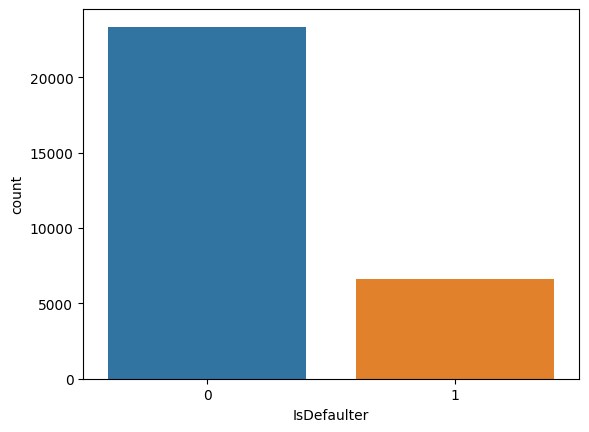

In [19]:
# Chart - 1 visualization code
#Visualizing dependent variable isDefaulter to see for any imbalances in data.

sns.countplot(x='IsDefaulter',data=df_copy)


##### 1. Why did you pick the specific chart?

Answer Here.

A count plot is a type of data visualization that displays the number of occurrences of each category in a categorical variable. It is a simple bar chart that shows the count or frequency of each unique value in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

It seems that the dataset is imbalanced.It is expected because defaulters will be in less quantity in real world, however we need to handle this using techniques like SMOTE before training the model for better accuracy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, by handling imbalanced dataset we can develop much more good model which will effectively predict defaulters.

#### Chart - 2

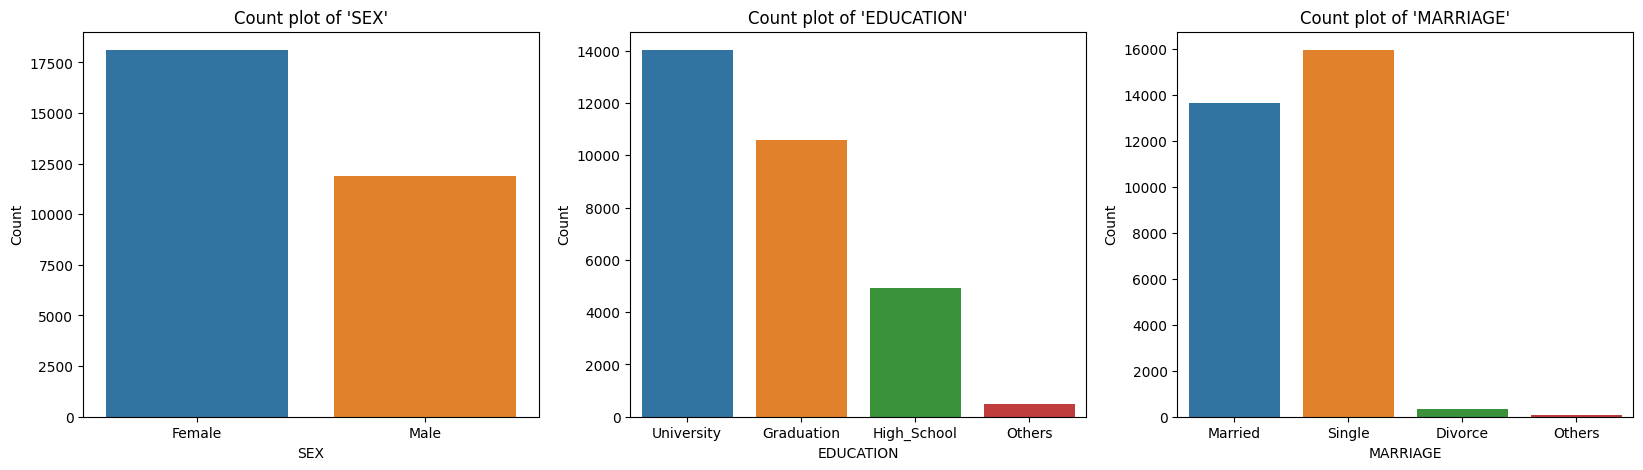

In [20]:
# Chart - 2 visualization code
# Create subplots based on the number of categorical variables
fig, axs = plt.subplots(1, len(categorical), figsize=(20, 5))

# Loop through each categorical variable
for i, cat_var in enumerate(categorical):
    # Visualization: Count plot of the categorical variable
    sns.countplot(data=df_copy, x=cat_var, ax=axs[i])

    # Set title for the subplot
    axs[i].set_title(f"Count plot of '{cat_var}'")

    # Set labels for x-axis and y-axis
    axs[i].set_xlabel(cat_var)
    axs[i].set_ylabel('Count')

##### 1. Why did you pick the specific chart?

Answer Here.

The count plot is suitable for visualizing the distribution of a categorical variable with relatively few unique values, like 'SEX',;EDUCATION' AND 'MARRIAGE' where we want to see the count of each category (male and female) in the SEX, University, graduation, highschool or others in Education and married, single or divorced in marriage.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1. Females are utilizing credict card facility more than males
2. Education level as university and graduation are more than other types.
3. Divorced people and others are less likely to utilize or using credit cards

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

There is no negative impact to business objective here,it is just a frequency plot. However we can find each variable relationship with IsDefaulter to draw meaningful insights.

#### Chart - 3

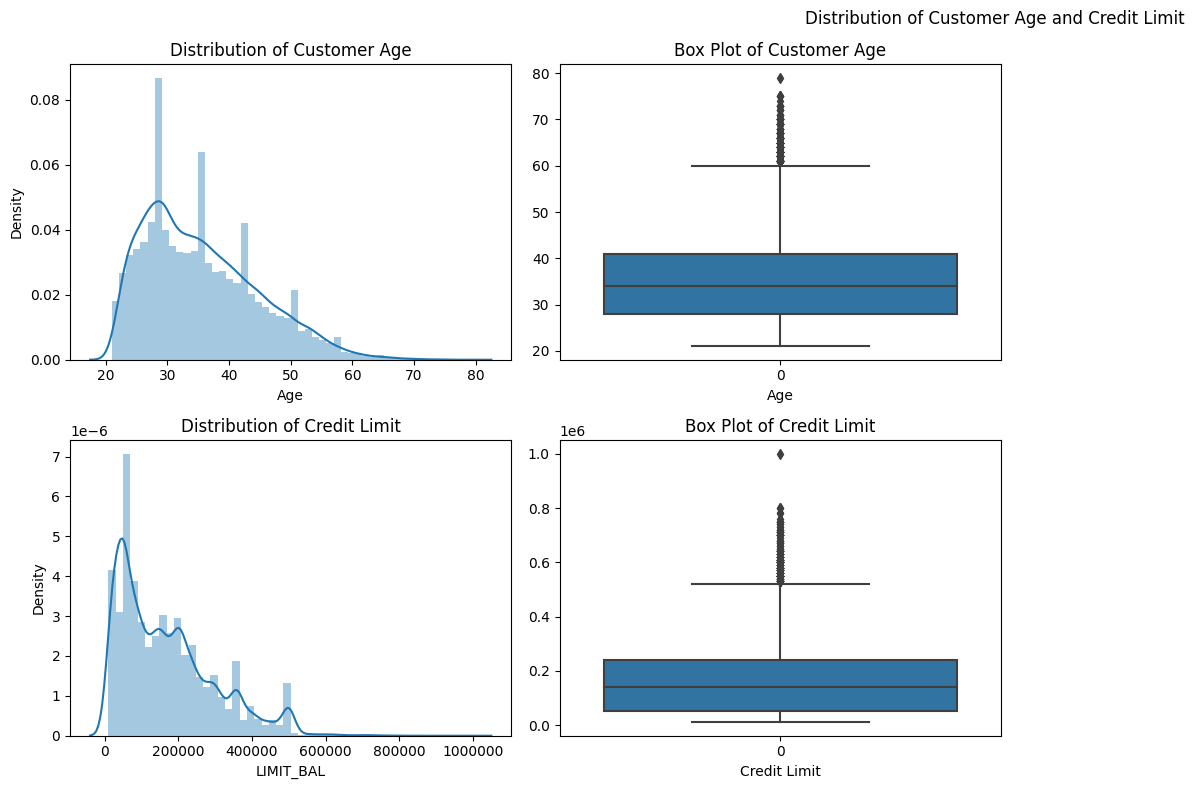

In [21]:
# Chart - 3 visualization code
# Distribution of age of customers and Credit Limit
plt.figure(figsize=(20, 8))
plt.suptitle('Distribution of Customer Age and Credit Limit')

# Subplot 1: Distribution plot of 'AGE'
plt.subplot(2, 4, 1)
sns.distplot(df_copy['AGE'])
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Subplot 2: Box plot of 'AGE'
plt.subplot(2, 4, 2)
sns.boxplot(df_copy['AGE'])
plt.title('Box Plot of Customer Age')
plt.xlabel('Age')

# Subplot 3: Distribution plot of 'LIMIT_BAL'
plt.subplot(2, 4, 5)
sns.distplot(df_copy['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribution of Credit Limit')

#plt.xlabel('Credit Limit')
#plt.ylabel('Density')

# Subplot 4: Box plot of 'LIMIT_BAL'
plt.subplot(2, 4, 6)
sns.boxplot(df_copy['LIMIT_BAL'])
plt.title('Box Plot of Credit Limit')
plt.xlabel('Credit Limit')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The distribution plot is used to visualize the distribution of 'AGE' and 'LIMIT_BAL', while the box plot helps to identify the central tendency and spread of the data for these two variables

##### 2. What is/are the insight(s) found from the chart?

Answer Here

For 'AGE': The distribution plot shows the age distribution of customers, indicating the most common age range and any potential skewness in the data. The box plot provides information about the median, quartiles, and potential outliers, which may be useful for identifying age-related patterns in credit defaulters.

For 'LIMIT_BAL': The distribution plot displays the distribution of credit limits among customers, giving insights into the common credit limit ranges. The box plot helps identify any potential outliers and the spread of credit limits, which can help in identifying customers with higher or lower credit limits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights gained from these visualizations can be valuable for the business's objective of predicting credit defaulters. Understanding the distribution and characteristics of age and credit limits among customers can aid in building more accurate models for predicting credit defaults and customizing risk management strategies.

#### Chart - 4  Bivariate Analyses/ Multivariate Analyses

# Analysing relationship between each categorical feature with respect to target variable.

In [22]:
categorical

['SEX', 'EDUCATION', 'MARRIAGE']

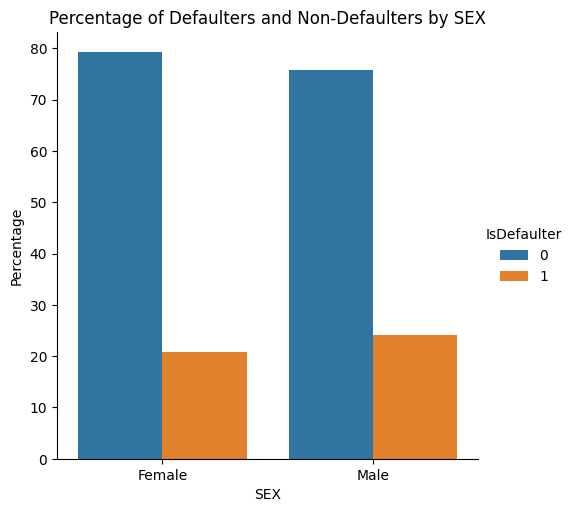

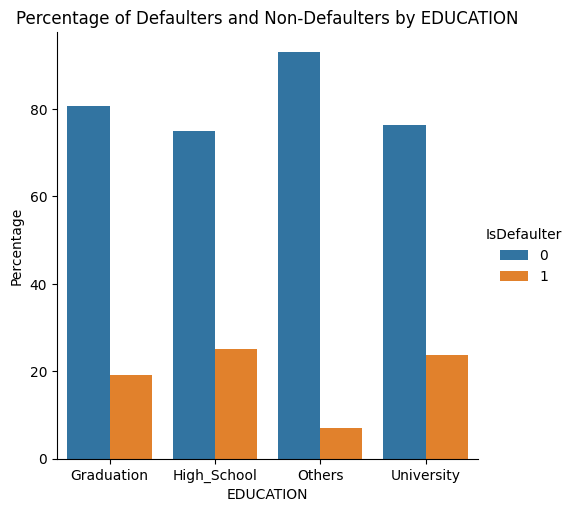

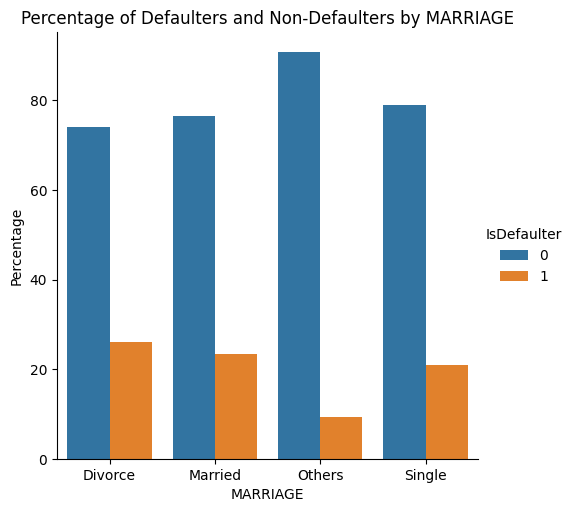

In [23]:
# Chart - 4 visualization code
# Loop through each categorical variable and create side-by-side bar plots
for cat_var in categorical:
    # Calculate the percentage of defaulters and non-defaulters for each category in the variable
    cat_default_percent = df_copy.groupby(cat_var)['IsDefaulter'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

    # Plot the side-by-side bar plot for the current categorical variable
    sns.catplot(data=cat_default_percent, x=cat_var, y='Percent', hue='IsDefaulter', kind='bar')
    plt.title(f"Percentage of Defaulters and Non-Defaulters by {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel('Percentage')
    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The catplot function is used in the visualization code above because it is specifically designed for creating categorical plots. It is a high-level function that can create a variety of categorical plots with just a single line of code.

In the given code, sns.catplot is used to create bar plots for each of the three categorical variables ('SEX', 'EDUCATION', and 'MARRIAGE').

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In the 'SEX' bar plot, It can be observed that even though the count of female customers are high, male customers are the ones who are defaulted more.

In the 'EDUCATION' bar plot, the majority proportion of defaulters are the high school and university students.

Similarly, in the 'MARRIAGE' bar plot, divorced and married people are more defaulters. It is also reasonable because married people and divorced people spend more rather than singles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Above visualizations can have a positive business impact. For example, if there are noticeable differences in default rates based on gender, education, or marital status, the business can tailor its credit risk assessment and marketing strategies accordingly. This can help in better targeting potential defaulters, reducing overall credit risk.

#### Chart - 5

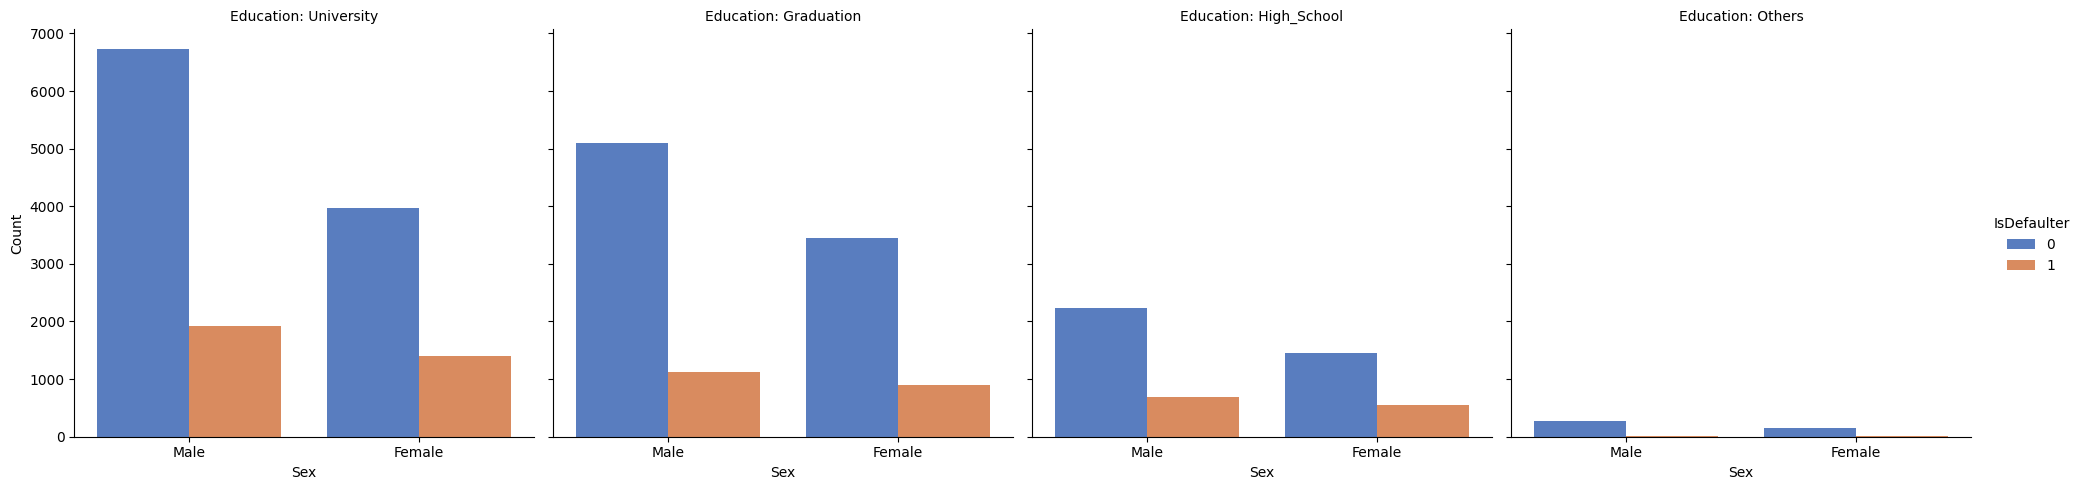

In [24]:
# Chart - 5 visualization code
# Create a categorical plot
g = sns.catplot(data=df_copy, x='SEX', hue='IsDefaulter', col='EDUCATION', kind='count', palette='muted')

# Set the axis labels
g.set_axis_labels('Sex', 'Count')

# Set the titles for each subplot based on the 'EDUCATION' column
g.set_titles("Education: {col_name}")

# Set custom x-axis tick labels
g.set_xticklabels(['Male', 'Female'])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I used catplot with 'SEX' and 'EDUCATION' as categorical variables and 'IsDefault' as the hue because it allows us to visualize the distribution of defaulters and non-defaulters across different combinations of 'SEX' and 'EDUCATION' categories. The bar plots in a grid layout provide a clear and concise representation of the data, making it easier to compare the proportions of defaulters and non-defaulters for each category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

we can observe which combinations of 'SEX' and 'EDUCATION' have a higher or lower proportion of defaulters, allowing us to identify potential patterns or trends in credit default behavior among different groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

For a particular combination of 'SEX' and 'EDUCATION' like university and males which has a significantly higher proportion of defaulters, the company can tailor its credit approval process and risk assessment for applicants with those characteristics, leading to better risk management and a positive business impact in terms of reduced default rates.

#### Chart - 6

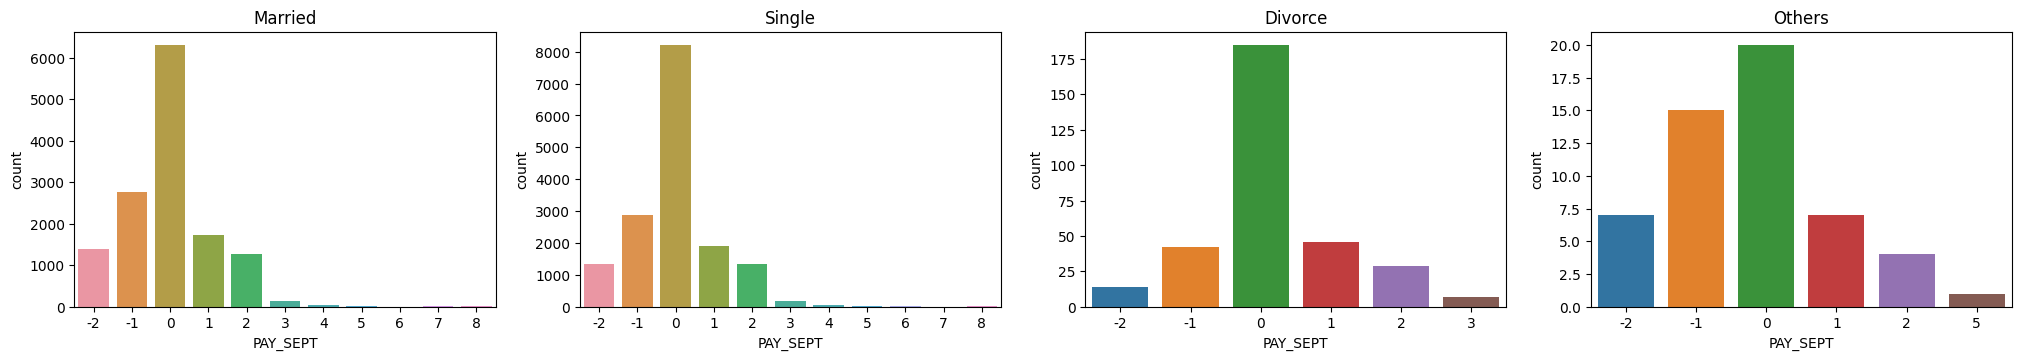

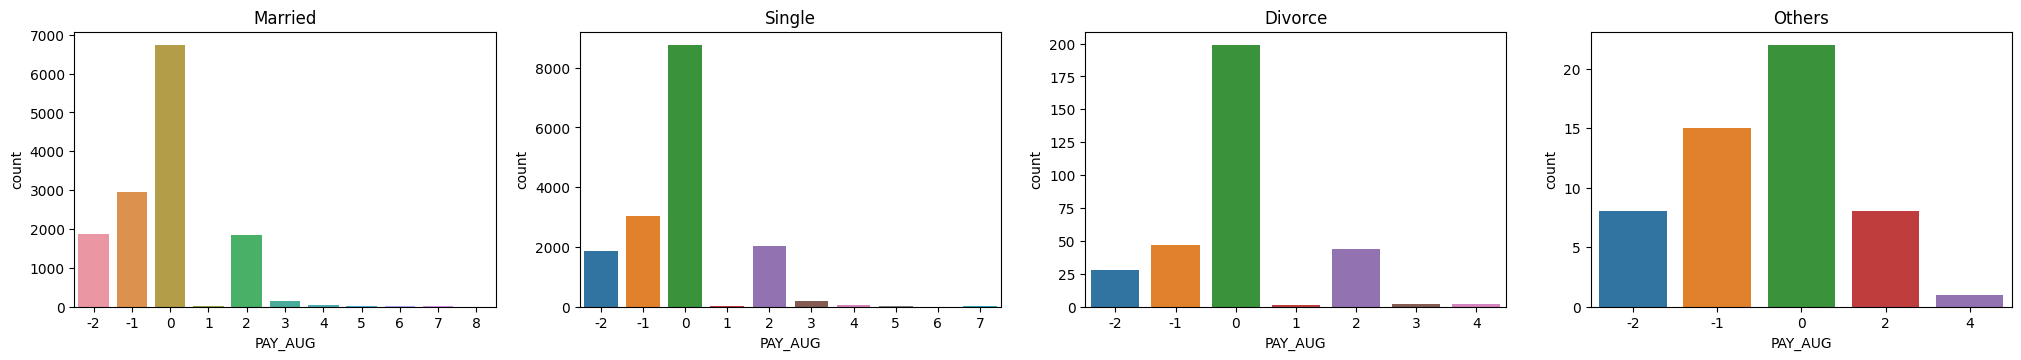

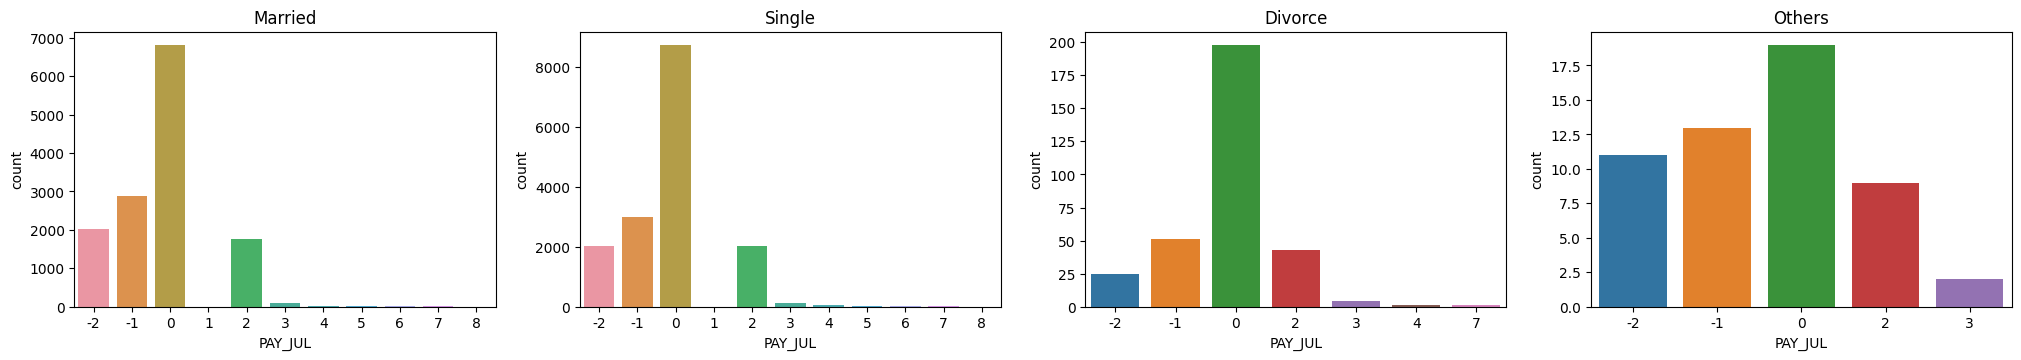

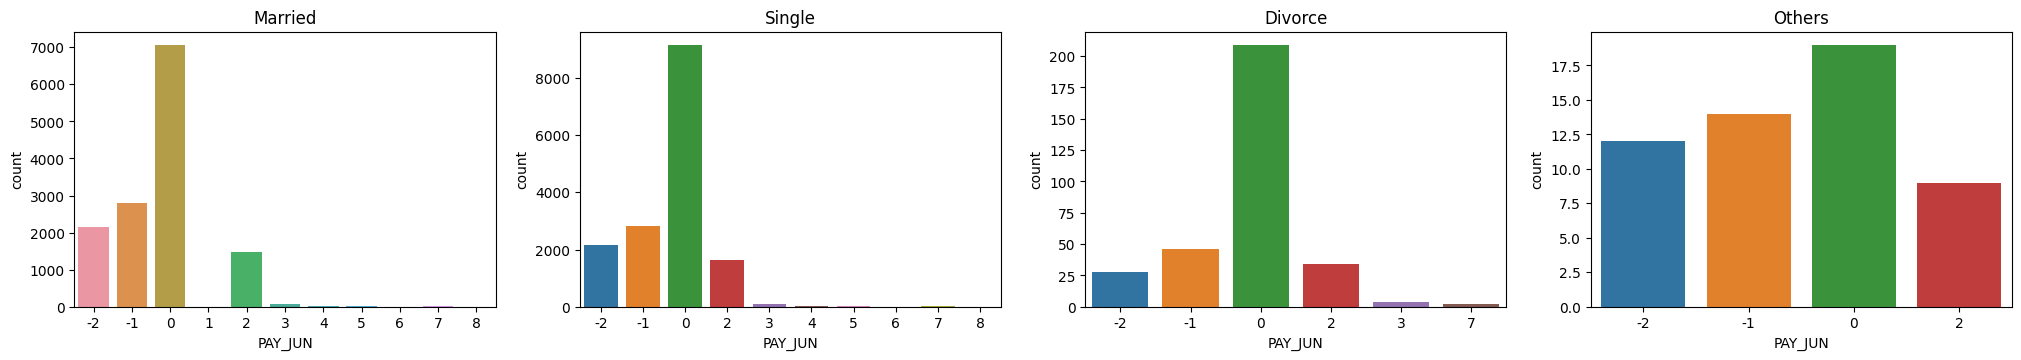

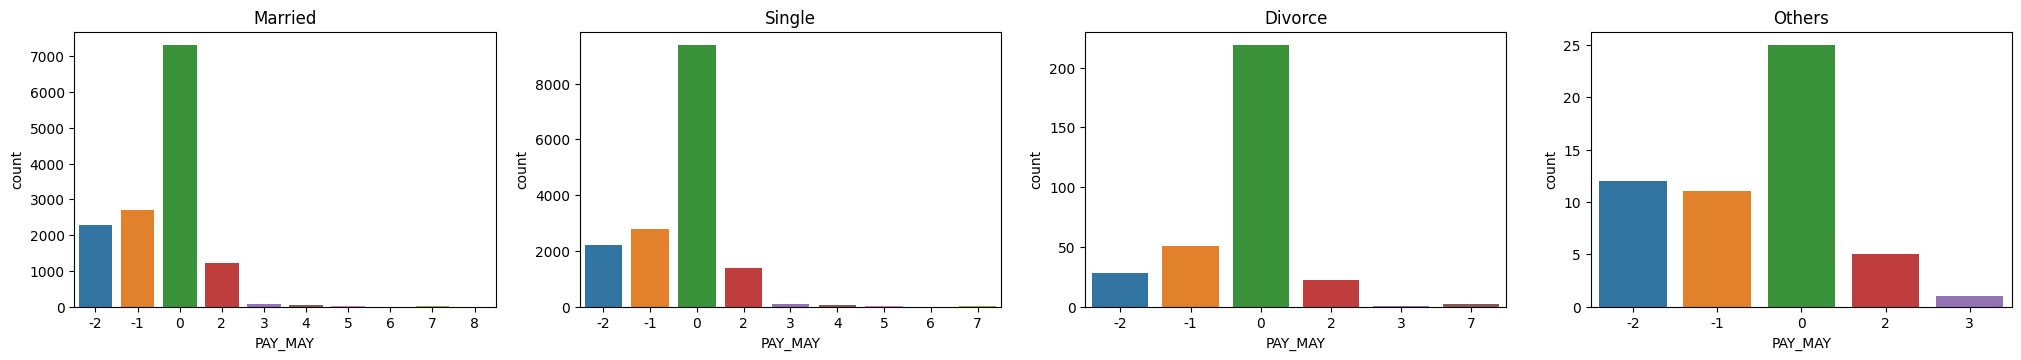

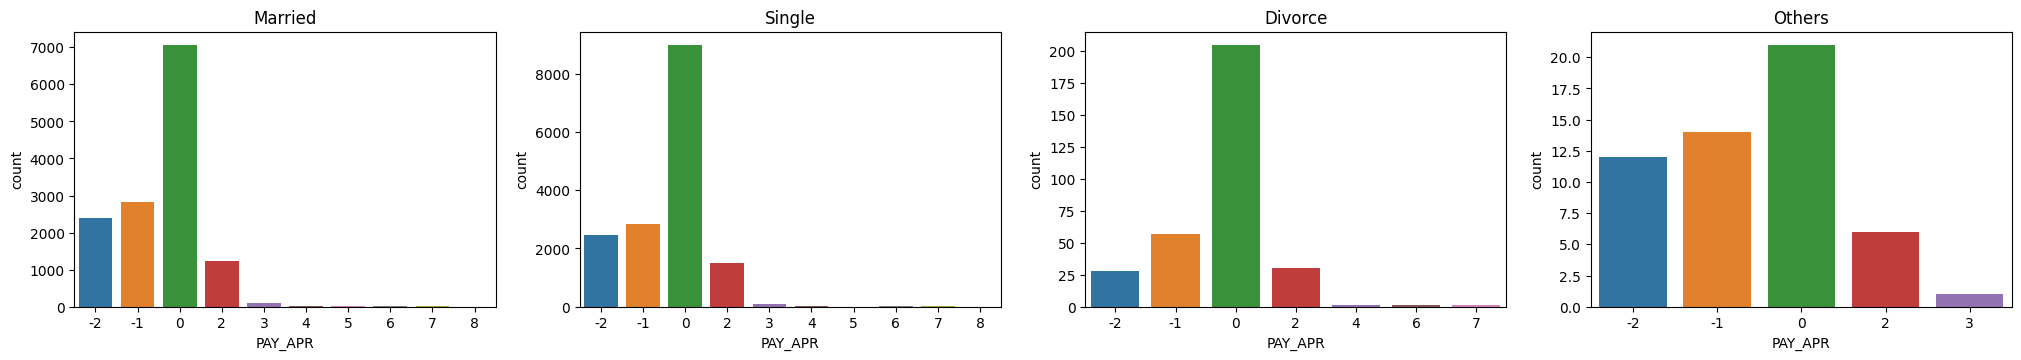

In [25]:
# Chart - 6 visualization code
# Marriage vs Payment status
i=1
# Define the repayment status columns in your dataset (df_copy)
pay_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
# Loop through each repayment status column
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df_copy['MARRIAGE'].unique():
    df_temp = df_copy[df_copy['MARRIAGE']==cat]
    plt.subplot(6,4,i)
     # Set the title
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status)

    # Increment the subplot index
    i=i+1
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Count plotcis suitable for visualizing the distribution of categorical variables. In this case, we want to observe the distribution of payment status for different marital status categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

1. It can be seen that most of the customers are utilizing revolving credit.
2. For all Marriage categories, maximum there is only 2 months of payment delay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive business impact: By identifying patterns of good payment behavior within specific marital status categories, businesses can offer targeted financial products and services to individuals who are more likely to repay their debts on time. This targeted approach can lead to improved customer satisfaction and loyalty.

Negative growth: On the other hand, If a particular marital status category consistently exhibits poor payment behavior and higher default rates, businesses may need to adjust their risk management strategies.

#### Chart - 7

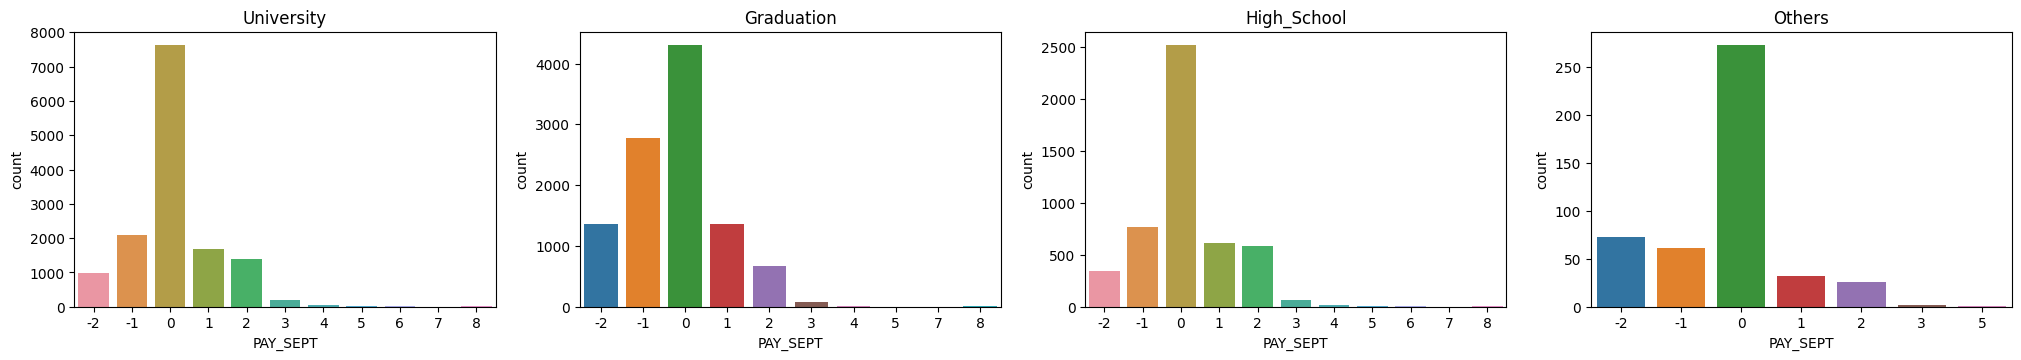

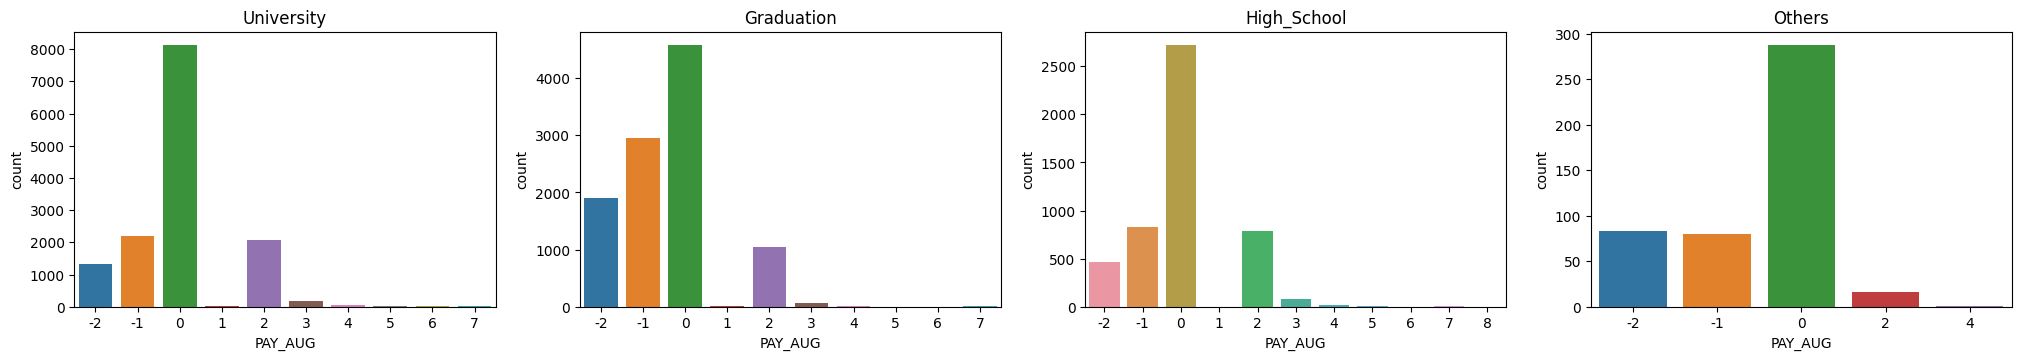

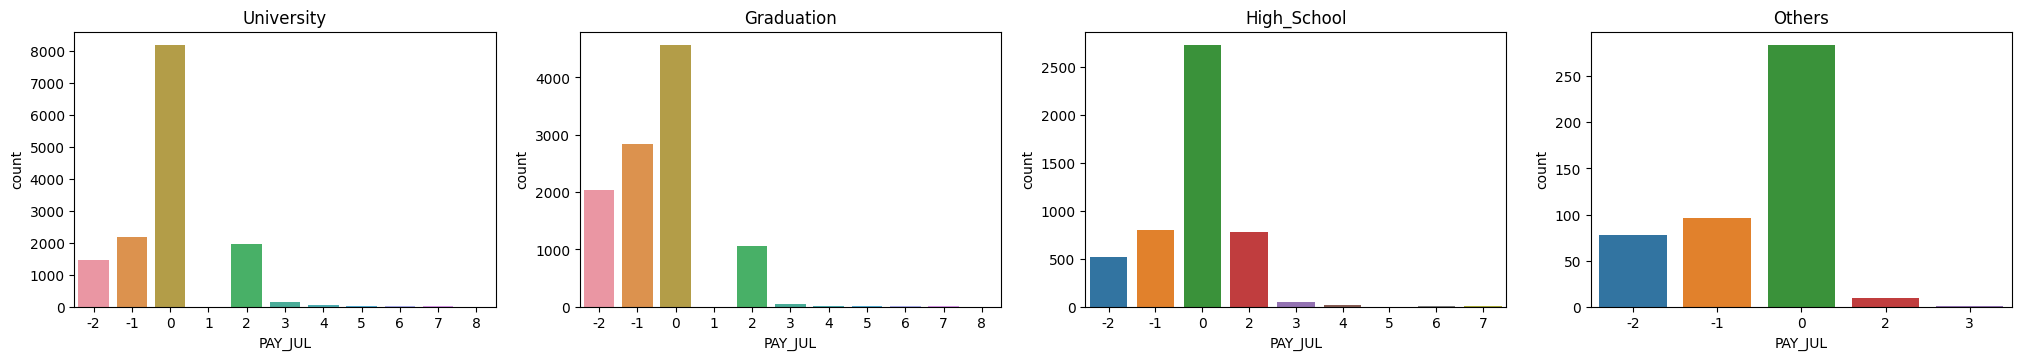

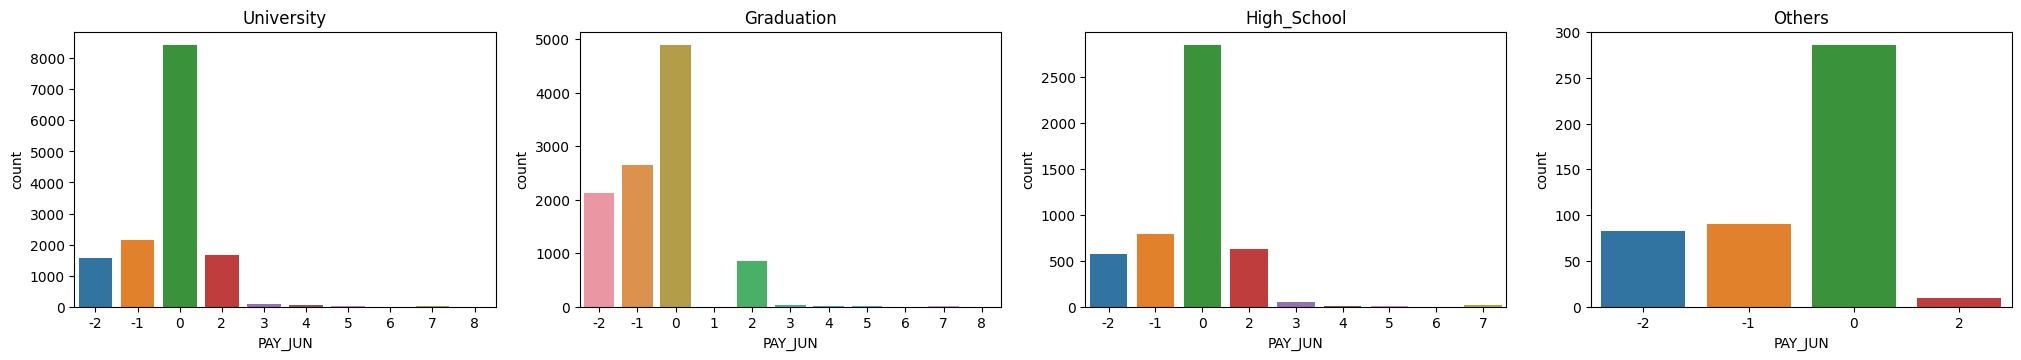

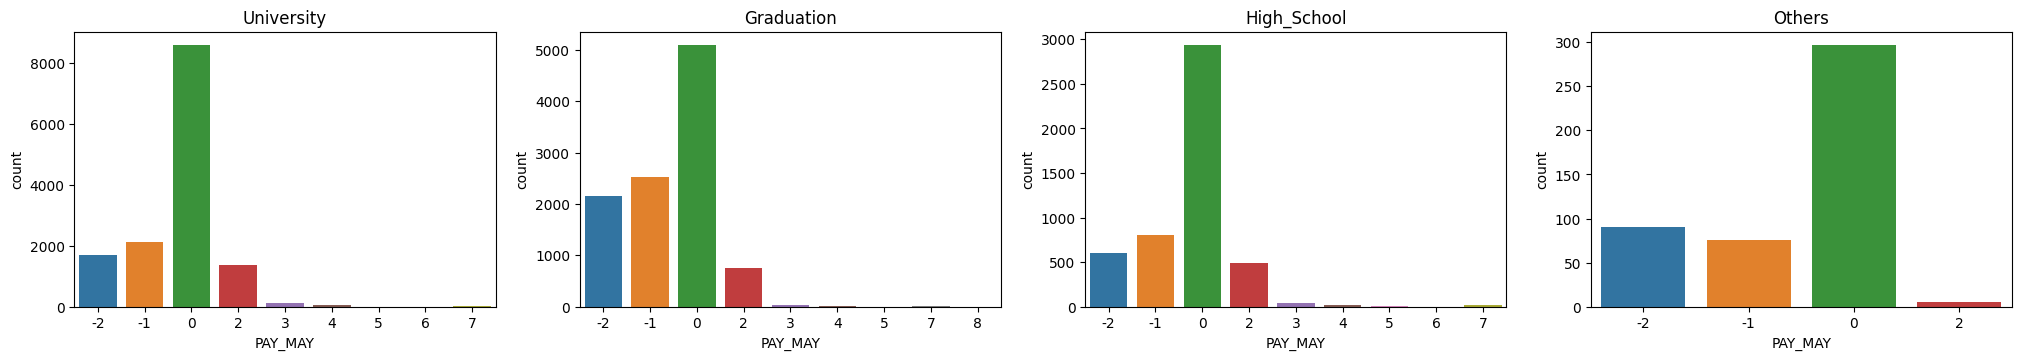

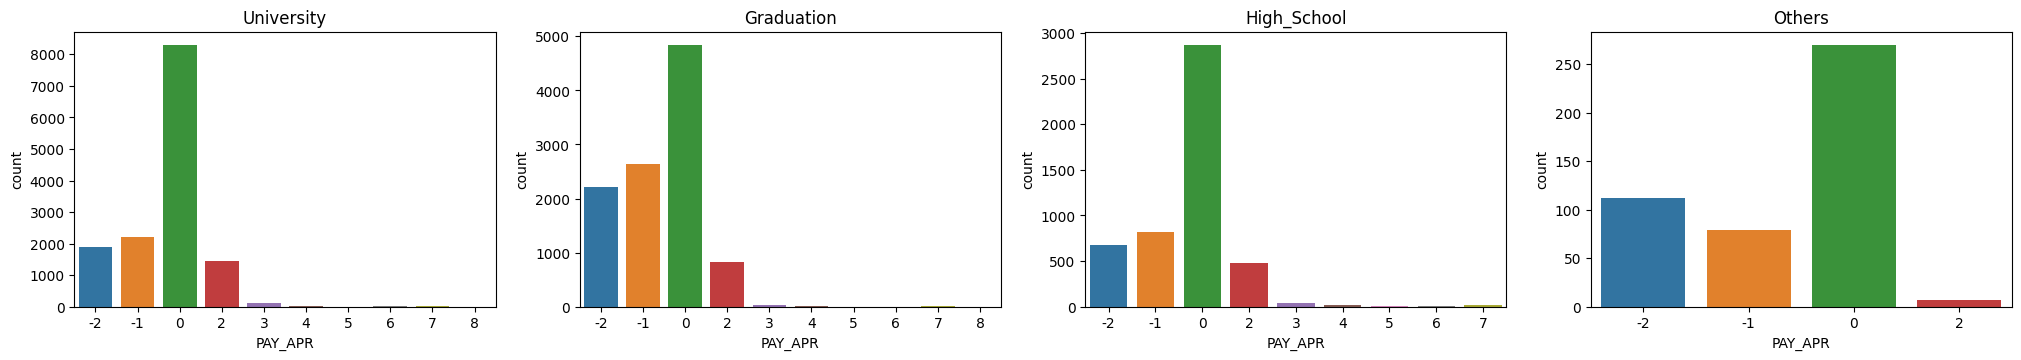

In [26]:
# Chart - 7 visualization code
# Distribution of education v/s repayment status
i=1
# Define the repayment status columns
pay_cols = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  # Loop through unique values in the 'EDUCATION' column
  for cat in df_copy['EDUCATION'].unique():
    df_temp = df_copy[df_copy['EDUCATION']==cat]
    plt.subplot(6,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status)
    # Increment the subplot index
    i=i+1
    # Display plot
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Count plotcis suitable for visualizing the distribution of categorical variables. In this case, we want to observe the distribution of payment status for different Education levels.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

I found that customers with graduate education level are utilizing the credit less and if utilized paying in full compared to University and High school level education customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

This can be helpful for business to target or keep close attention on university and highschool customers where chance of repayment is delayed and further can be a defaulter.

#### Chart - 8

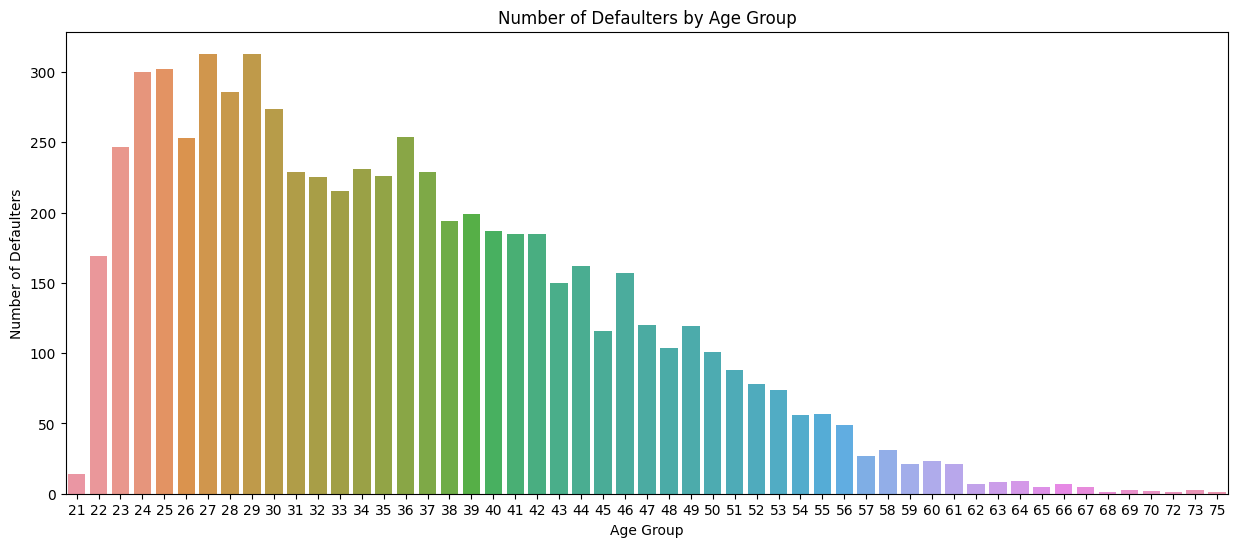

In [27]:
# Chart - 8 visualization code
# Count the number of defaulters in each age group
defaulters_by_age_group = df_copy[df_copy['IsDefaulter'] == 1]['AGE'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=defaulters_by_age_group.index, y=defaulters_by_age_group.values)
plt.title('Number of Defaulters by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Defaulters')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar plot is suitable for comparing the number of defaulters across different age groups.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

It can be seen that customers from age 23 to 42 are the ones defaulting the payment most.

#### Chart - 9

# Do defaulters have low credit limit?

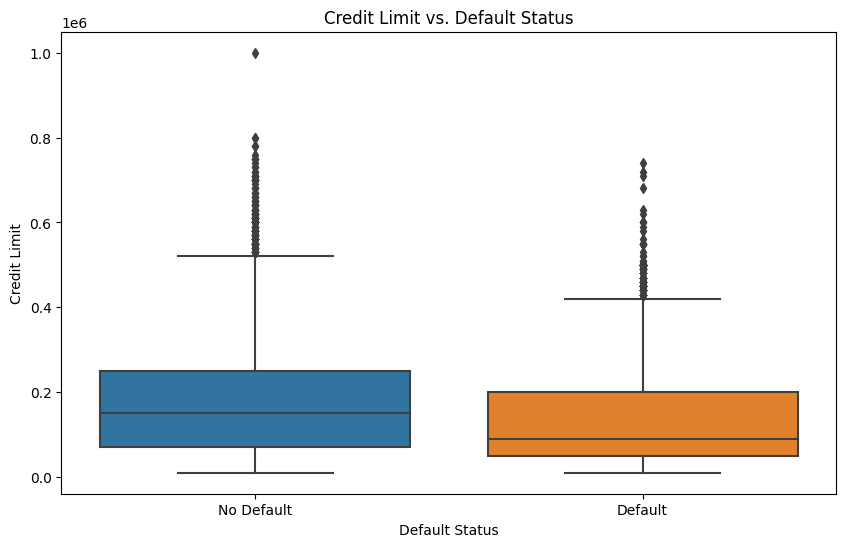

In [28]:
# Chart - 9 visualization code
# Create a boxplot comparing Credit Limit vs. Default Status
plt.figure(figsize=(10, 6))

# Create a boxplot using Seaborn
sns.boxplot(x='IsDefaulter', y='LIMIT_BAL', data=df_copy)

# Set the title of the plot
plt.title('Credit Limit vs. Default Status')

# Set the x-axis label
plt.xlabel('Default Status')

# Set the y-axis label
plt.ylabel('Credit Limit')

# Customize x-axis ticks and labels
plt.xticks([0, 1], ['No Default', 'Default'])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Box plot is suitable for comparing the distribution of a continuous variable (credit limit) between two categories (defaulters and non-defaulters).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

It can be seen that the interquartile range (IQR) for defaulters is narrower than for non-defaulters, suggesting that defaulters tend to have lower credit limits on average compared to non-defaulters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

There is nothing to be gained from here, because I think that it is common with customers with no default history has higher credit limit. But, we should not conclude by only taking this Credit Limit variable. Income of a person should have been more important factor in this problem if given.

#### Chart - 10

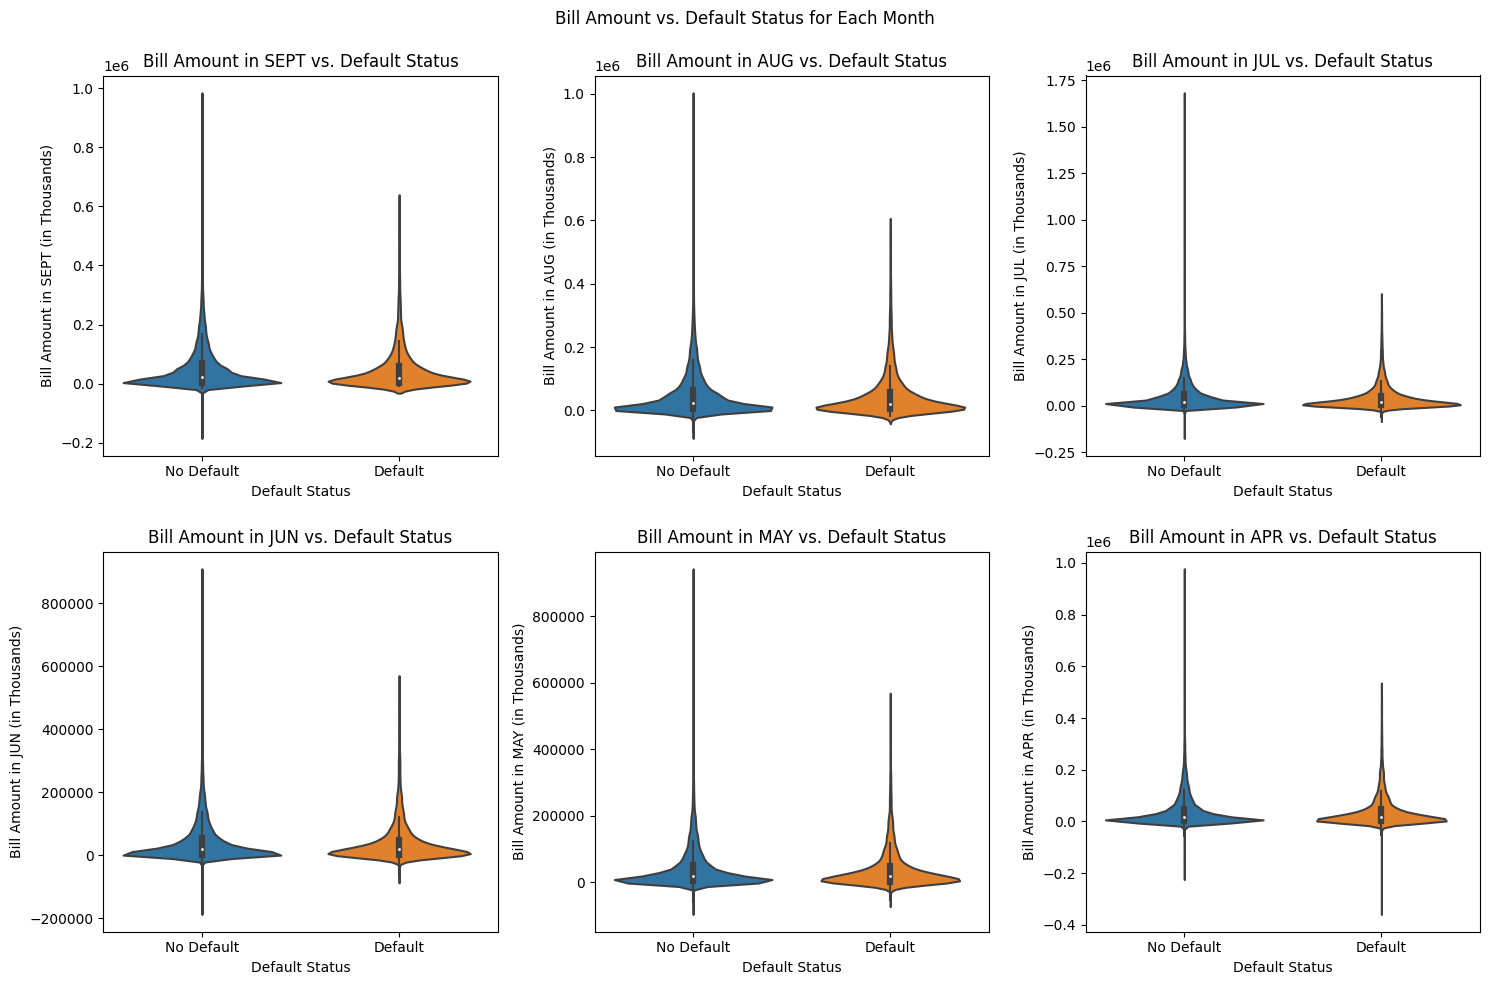

In [29]:
# Chart - 10 visualization code
# Define the bill amount columns
bill_amount_cols = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Bill Amount vs. Default Status for Each Month')
# Loop through each bill amount column and create a violin plot for defaulters and non-defaulters
for i, bill_col in enumerate(bill_amount_cols):
    # Determine the row and column position in the subplot grid
    row = i // 3
    col = i % 3

    # Create a violin plot for the current bill amount column
    sns.violinplot(x='IsDefaulter', y=bill_col, data=df_copy, ax=axs[row, col])

    # Set title for the subplot
    axs[row, col].set_title(f'Bill Amount in {bill_col.split("_")[2]} vs. Default Status')

    # Set x-axis label
    axs[row, col].set_xlabel('Default Status')

    # Set y-axis label
    axs[row, col].set_ylabel(f'Bill Amount in {bill_col.split("_")[2]} (in Thousands)')

    # Customize x-axis
    axs[row, col].set_xticklabels(['No Default', 'Default'])
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

violin plots can effectively display the distribution of bill amounts for each month, separated by the default status (defaulters and non-defaulters). Violin plots provide insights into the data's kernel density estimation and quartile information, making them suitable for comparing the concentration and spread of bill amounts for both default groups in different months.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The bill amounts tend to be higher for non-defaulters compared to defaulters across all months.The pattern is consistent across all months, suggesting that the bill amounts' relationship with default status is relatively stable.

I can also see that customers are classified as defaulters with bill amount negative. They overpaid the bill, but still defaulters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

By seeing the relationship between bill amount and default status as stable. It is safe to provide more credit limit to non defaulters and make them feel like valuable customers.

#### Chart - 11  Correlation Heatmap

<Axes: >

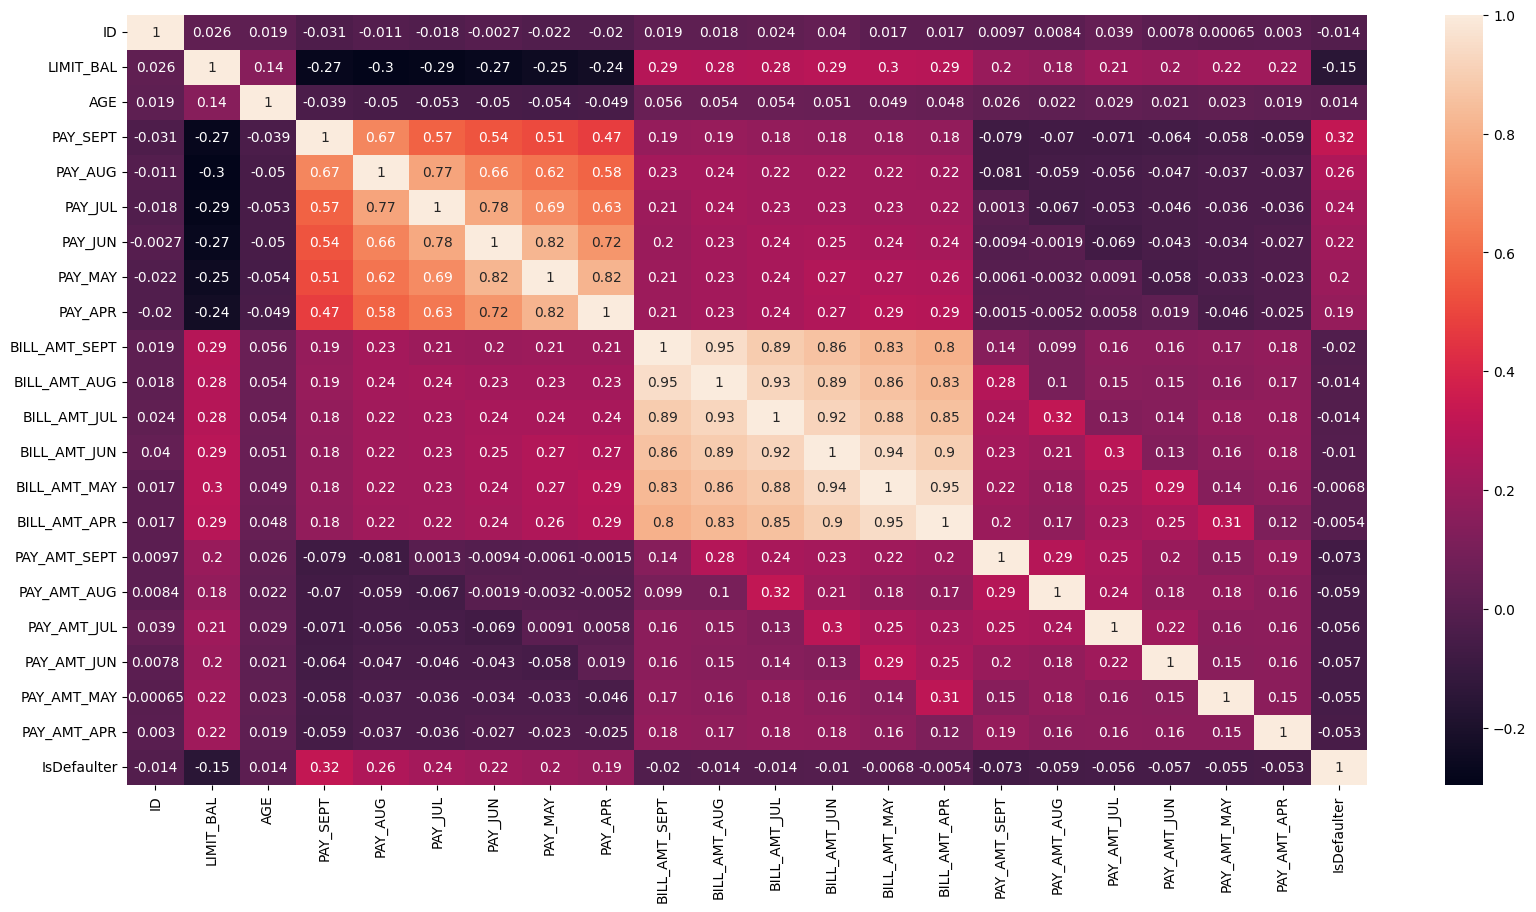

In [30]:
# Correlation Heatmap visualization code
fig=plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(),annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

A correlation matrix is a table showing correlation coefficients between variables. The range of correlation is [-1,1].

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The repayment status variables (PAY_SEPT to PAY_APR) are positively correlated with each other, indicating that if a customer was delayed in one month, they were likely to be delayed in subsequent months as well.

The amount of bill statements (BILL_AMT_SEPT to BILL_AMT_APR) are positively correlated with each other, suggesting that customers with higher bill amounts in one month tend to have higher bill amounts in other months too.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

1.The average credit limit for defaulters is significantly lower than the average credit limit for non-defaulters.

2.There is a Correlation between education and payment default.

3.Correlation between credit limit and sex who are likely to default.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H0): The average credit limit for defaulters is equal to or higher than the average credit limit for non-defaulters.

Alternate Hypothesis (H1): The average credit limit for defaulters is significantly lower than the average credit limit for non-defaulters.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

defaulters_limit = df_copy[df_copy['IsDefaulter'] == 1]['LIMIT_BAL']
non_defaulters_limit = df_copy[df_copy['IsDefaulter'] == 0]['LIMIT_BAL']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(defaulters_limit, non_defaulters_limit, equal_var=False)

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print(" The average credit limit for defaulters is significantly lower than the average credit limit for non-defaulters.")
else:
    print(" The average credit limit for defaulters is not significantly different from the average credit limit for non-defaulters.")


 The average credit limit for defaulters is significantly lower than the average credit limit for non-defaulters.


##### Which statistical test have you done to obtain P-Value?

The statistical test I performed to obtain the p-value is the independent two-sample t-test.

##### Why did you choose the specific statistical test?

Answer Here.

I chose the independent two-sample t-test because we are comparing the means of two independent groups (defaulters and non-defaulters) with a continuous variable (credit limit). The t-test is appropriate for such a scenario as it allows us to determine if there is a significant difference between the means of the two groups and if this difference is unlikely to have occurred by chance alone.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between education and payment default.

Alternate Hypothesis (H1): There is a correlation between education and payment default.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
# Contingency table for education and payment default
observed = pd.crosstab(df_copy['EDUCATION'], df_copy['IsDefaulter'])

# Perform the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Print the p-value
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print("There is a significant correlation between education and payment default.")
    print("We reject the null hypothesis.")
else:
    print("There is no significant correlation between education and payment default.")
    print("We fail to reject the null hypothesis.")

P-value: 1.4950645648106153e-34
There is a significant correlation between education and payment default.
We reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

I have performed the Chi-square test (chi2_contingency) to obtain the P-value. The Chi-square test is used to determine whether there is a significant association between two categorical variables, in this case, education and payment default.

##### Why did you choose the specific statistical test?

Answer Here.

I chose the Chi-square test because we are dealing with categorical variables (education and payment default), and we want to investigate if there is a correlation between them. The Chi-square test is commonly used for this type of analysis, especially when we have a contingency table like the one I created above using pd.crosstab.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H0): There is no significant difference in credit limit between males and females who default on payment.

Alternative Hypothesis (H1): There is a significant difference in credit limit between males and females who default on payment.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
# Data for males who defaulted on payment
male_defaulters = df_copy[(df_copy['SEX'] == 'Male') & (df_copy['IsDefaulter'] == 1)]['LIMIT_BAL']

# Data for females who defaulted on payment
female_defaulters = df_copy[(df_copy['SEX'] == 'Female') & (df_copy['IsDefaulter'] == 1)]['LIMIT_BAL']

# Perform the independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_defaulters, female_defaulters, equal_var=False)

# Define significance level (alpha)
alpha = 0.05

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Compare p-value with the significance level to draw conclusions
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in credit limit between males and females who default on payment.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in credit limit between males and females who default on payment.")

T-Statistic: -2.587169286318311
P-Value: 0.009699902542739034
Reject Null Hypothesis: There is a significant difference in credit limit between males and females who default on payment.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

I have performed an independent two-sample t-test to obtain the P-value. This test is used to compare the means of two independent groups to determine if there is a statistically significant difference between them.

##### Why did you choose the specific statistical test?

Answer Here.

I did independent two-sample t-test because we want to compare the credit limit (a continuous variable) between two independent groups (males and females) with respect to the default status (defaulters and non-defaulters). The t-test is appropriate for this scenario as it allows us to assess if there is a significant difference in the means of the credit limit between the two groups while taking into account the variability within each group.

Additionally,I chose equal_var=False because the assumption of equal variances might not be valid given the differences in credit limit variability between males and females.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
df_copy.isnull().sum()

ID               0
LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
IsDefaulter      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We don't have any missing value in our dataset

### 2. Handling Outliers

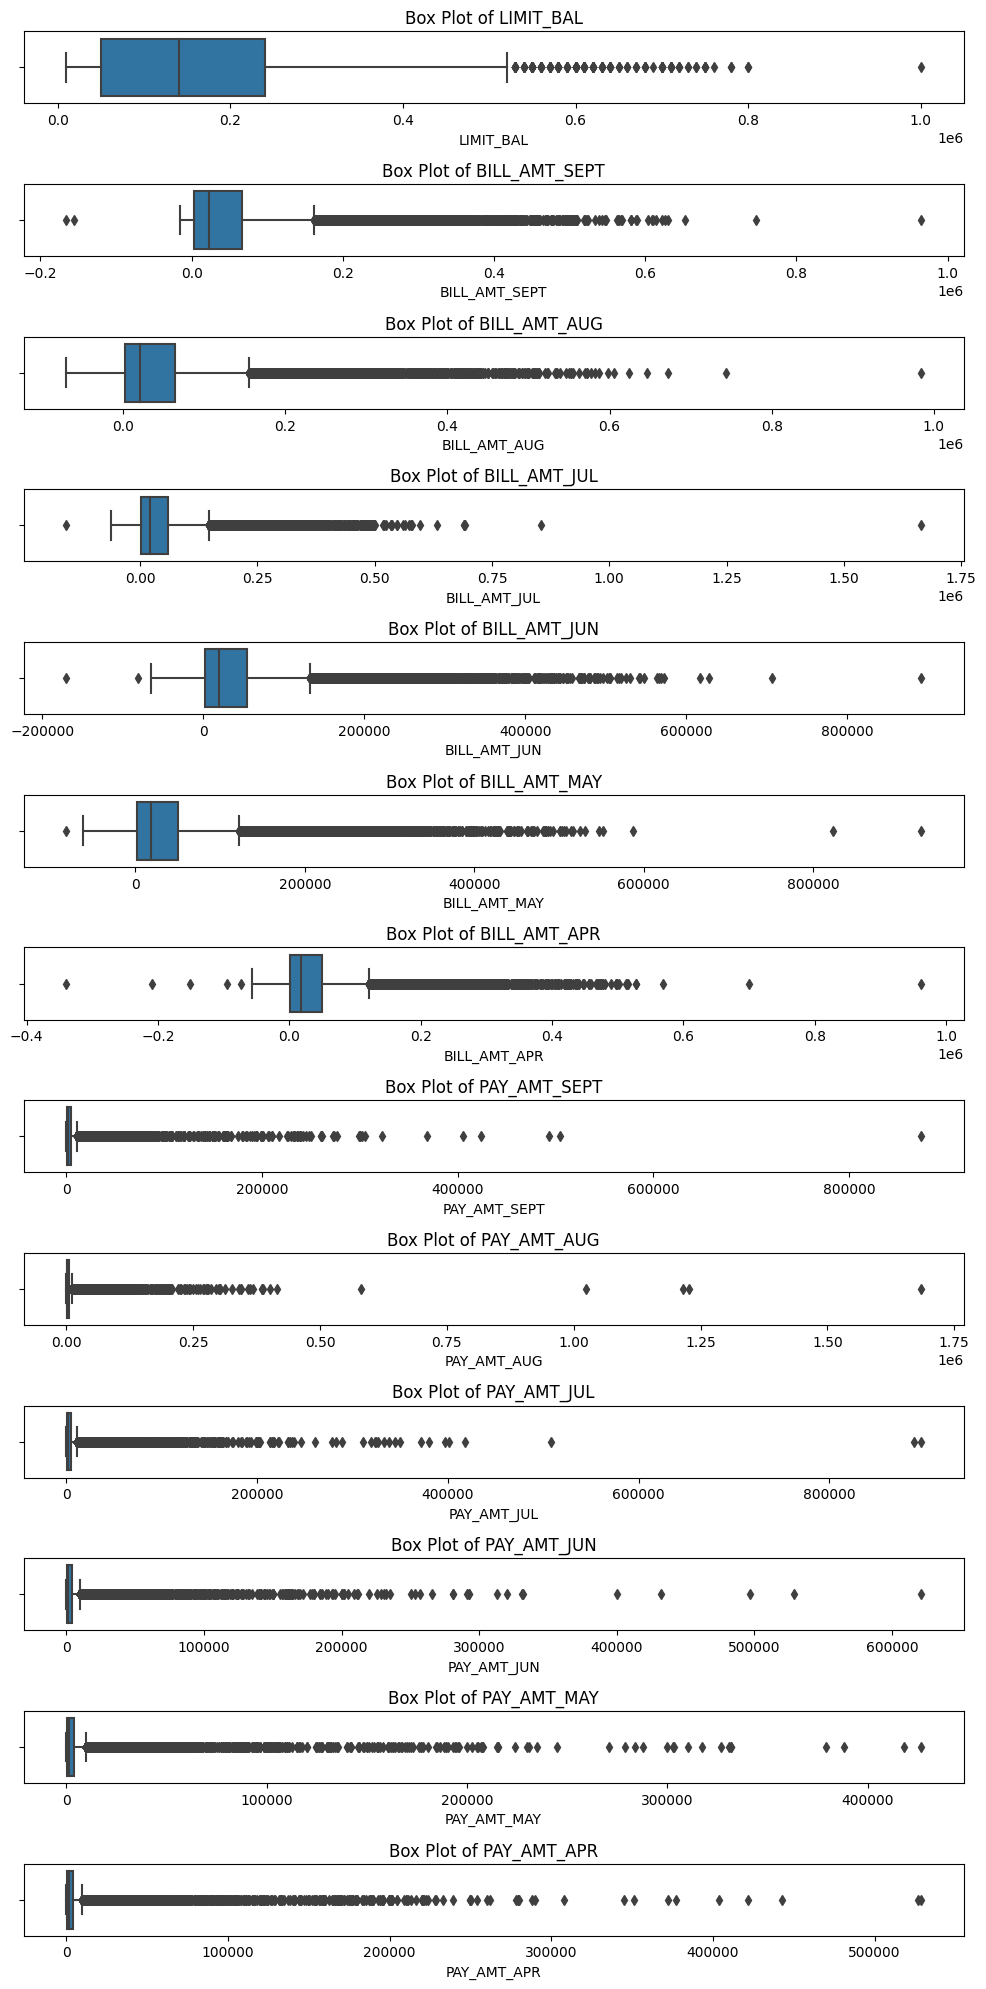

In [36]:
# Handling Outliers & Outlier treatments

# Select only the continuous numerical variables
continuous_numerical_vars = ['LIMIT_BAL','BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
                            'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
                            'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Create subplots to display box plots for each continuous numerical variable
fig, axs = plt.subplots(len(continuous_numerical_vars), figsize=(10, 20))

# Loop through each continuous numerical variable and plot the box plot
for i, var in enumerate(continuous_numerical_vars):
    sns.boxplot(x=df_copy[var], ax=axs[i])
    axs[i].set_title(f"Box Plot of {var}")
    axs[i].set_xlabel(var)

plt.tight_layout()
plt.show()

In [37]:
df_final=df_copy.copy()
df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


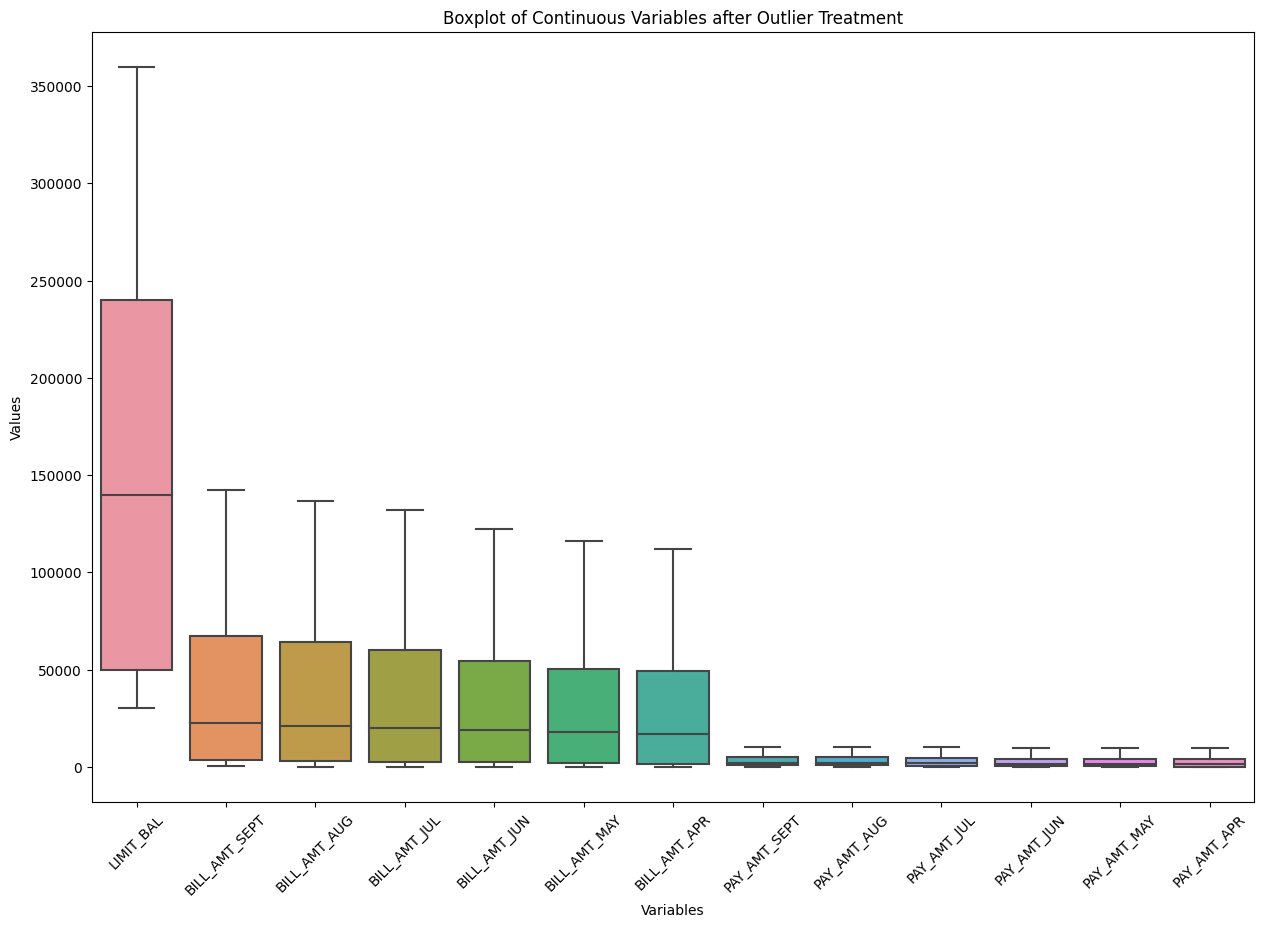

In [38]:
# Define the continuous variables
continuous_vars = ['LIMIT_BAL', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
                   'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                   'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Loop through each continuous variable and apply outlier treatment
for var in continuous_vars:
    # Calculate the 1st and 99th percentile of the variable
    lower_bound = df_final[var].quantile(0.10)
    upper_bound = df_final[var].quantile(0.90)

    # Replace values below the lower bound with the lower bound
    df_final[var] = df_final[var].apply(lambda x: lower_bound if x < lower_bound else x)

    # Replace values above the upper bound with the upper bound
    df_final[var] = df_final[var].apply(lambda x: upper_bound if x > upper_bound else x)

# Visualize the boxplots for each continuous variable after outlier treatment
plt.figure(figsize=(15, 10))
plt.title('Boxplot of Continuous Variables after Outlier Treatment')
sns.boxplot(data=df_final[continuous_vars])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

The outlier treatment technique used is capping, which involves setting the extreme values (outliers) to specific percentiles of the data. Specifically, the 10th percentile and 90th percentile are used as lower bound and upper bound to cap the values.

### 3. Categorical Encoding

In [39]:
df_final.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,30000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [40]:
# Encode your categorical columns
categorical

['SEX', 'EDUCATION', 'MARRIAGE']

In [41]:
# One hot Encoding
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'])

df_final.head()


,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Divorce,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,30000.0,24,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1,0,0,0,0,1,0,0,0,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1,0,0,0,0,1,0,0,0,1
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1,0,0,0,0,1,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,1,0,0,0,1,0,1,0,0


In [42]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
df_final['AGE'] = pd.cut(df_final['AGE'],bins=bins, labels=labels,right=False)

# Covert categorical column into integer by extracting the code of the categories
# Label Encoding
df_final.AGE = df_final.AGE.cat.codes

df_final.head(3)

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Divorce,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,30000.0,0,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,1,0,0
1,2,120000.0,0,-1,2,0,0,0,2,2682.0,...,1,0,0,0,0,1,0,0,0,1
2,3,90000.0,1,0,0,0,0,0,0,29239.0,...,1,0,0,0,0,1,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

I did Binning for AGE variable and Label Encoding.The cat.codes attribute of the AGE column converts the categories into numerical codes. Each age group is now represented by an integer from 0 to 5.

One-Hot Encoding: Performed one-hot encoding on the SEX, EDUCATION, and MARRIAGE columns using the pd.get_dummies() function. One-hot encoding converts categorical variables into a binary representation, where each category is represented by a new binary column (0 or 1). This is done to make the data suitable for machine learning algorithms that require numerical inputs.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
# Manipulate Features to minimize feature correlation and create new features
# removing Id column as it is of no use in prediction

df_final = df_final.drop(columns=['ID'])
df_final.head(2)

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Divorce,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,30000.0,0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,1,0,0,0,0,1,0,1,0,0
1,120000.0,0,-1,2,0,0,0,2,2682.0,1725.0,...,1,0,0,0,0,1,0,0,0,1


<Axes: >

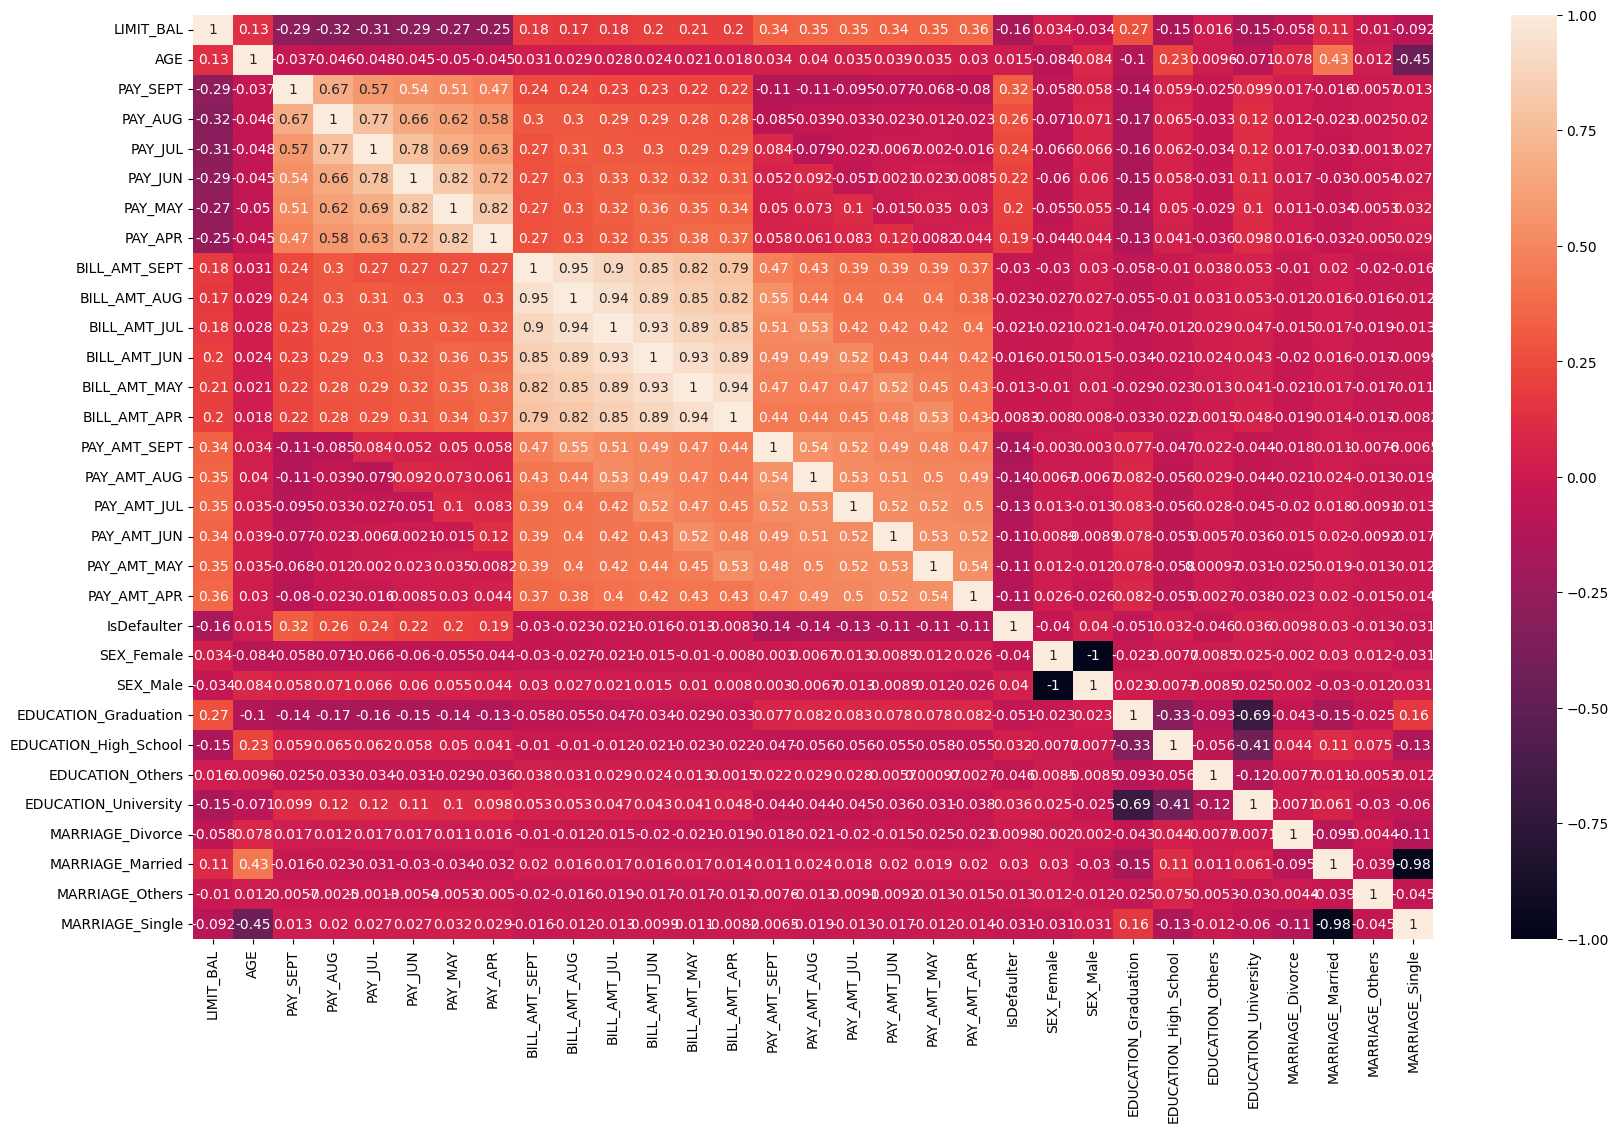

In [44]:
fig=plt.figure(figsize=(20,12))
sns.heatmap(df_final.corr(),annot=True)

Inthis heatmap we can see that BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY, BILL_AMT_APR are highly correlated to each other. So, I am creating a new feature which average of bill amounts.

In [45]:
# copy the model
df_fs=df_final.copy()
df_fs.head(2)

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Divorce,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,30000.0,0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,1,0,0,0,0,1,0,1,0,0
1,120000.0,0,-1,2,0,0,0,2,2682.0,1725.0,...,1,0,0,0,0,1,0,0,0,1


In [46]:
# create a new column for average bill amount
df_fs['AVG_BILL_AMT'] = df_fs[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']].mean(axis=1)


# Drop the individual bill amount columns
df_fs = df_fs.drop(columns=['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR'])

In [47]:
# Display the updated dataset with the new 'AVG_BILL_AMT' feature
df_fs.head(3)

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,PAY_AMT_SEPT,PAY_AMT_AUG,...,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Divorce,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,AVG_BILL_AMT
0,30000.0,0,2,2,-1,-1,-2,-2,0.0,689.0,...,0,0,0,0,1,0,1,0,0,1284.000000
1,120000.0,0,-1,2,0,0,0,2,0.0,1000.0,...,0,0,0,0,1,0,0,0,1,2846.166667
2,90000.0,1,0,0,0,0,0,0,1518.0,1500.0,...,0,0,0,0,1,0,0,0,1,16942.166667


In [48]:
# using variation Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [49]:
calc_vif(df_fs[[i for i in df_fs.describe().columns if i not in ['IsDefaulter','SEX_Female','SEX_Male','EDUCATION_Graduation','EDUCATION_Others','EDUCATION_High_School','EDUCATION_University','MARRIAGE_Divorce','MARRIAGE_Others','MARRIAGE_Single','MARRIAGE_Married']]])

,variables,VIF
0,LIMIT_BAL,3.905865
1,AGE,1.859498
2,PAY_SEPT,1.937970
3,PAY_AUG,3.399776
4,PAY_JUL,4.322881
5,PAY_JUN,5.078709
6,PAY_MAY,5.564091
7,PAY_APR,3.699212
8,PAY_AMT_SEPT,4.244588
9,PAY_AMT_AUG,4.230897


In [50]:
df_fs.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter',
       'SEX_Female', 'SEX_Male', 'EDUCATION_Graduation',
       'EDUCATION_High_School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Divorce', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single', 'AVG_BILL_AMT'],
      dtype='object')

#### 2. Feature Selection

In [51]:
x_fs = df_fs.drop(columns=['IsDefaulter'], axis=1)
y_fs = df_fs['IsDefaulter']

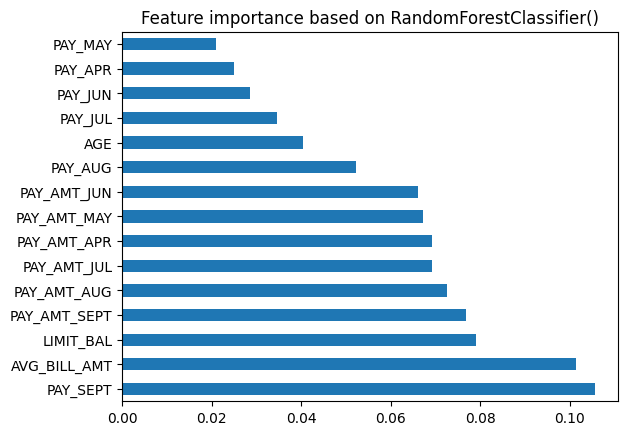

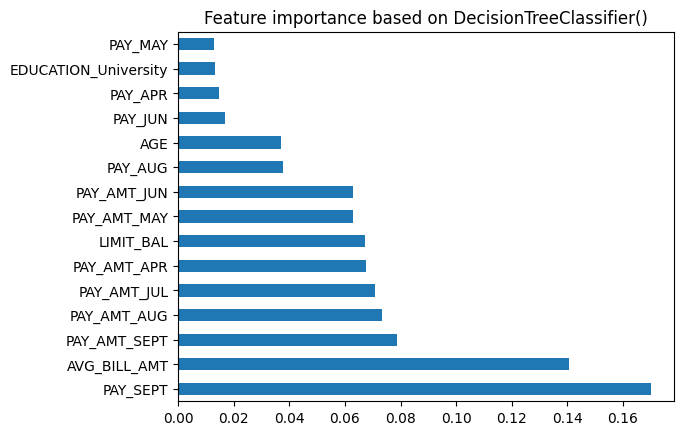

In [52]:
# Select your features wisely to avoid overfitting
#Analysing feature importance based RandomForestClassifier,DecisionTreeClassifier and XGBClassifier
for v in [RandomForestClassifier(),DecisionTreeClassifier()]:
    v.fit(x_fs,y_fs)
    ranked_features=pd.Series(v.feature_importances_,index=x_fs.columns)
    ranked_features.nlargest(15).plot(kind='barh')#barplot based on feature importance
    plt.title(f'Feature importance based on {v}')
    plt.show()

In [53]:
# dropping below two columns as they have only few data points and i am keeping remaining variables as it is
x_fs.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

##### What all feature selection methods have you used  and why?

Answer Here.

I used:- Random Forest Classifier, Decision Tree Classifier

Feature importance is a measure of the contribution of each feature or variable in a machine learning model to predict the target variable.

Random Forest Classifier and Decision Tree Classifier are machine learning algorithms that can be used to identify feature importance.

Random Forest Classifier: In a random forest classifier, the feature importance is calculated based on the mean decrease impurity of each feature across all decision trees in the forest. The impurity of a node in a decision tree is measured by the Gini index or the entropy. The mean decrease impurity of a feature is calculated by averaging the impurity decrease over all the decision trees that use that feature.

Decision Tree Classifier: In a decision tree classifier, the feature importance is calculated based on the impurity decrease or information gain of each feature. The impurity decrease of a feature is the reduction in impurity that results from splitting a node on that feature. The information gain is a measure of the reduction in entropy or Gini index achieved by splitting a node on that feature.

In [54]:
print(x_fs.columns.to_list())

['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'SEX_Female', 'SEX_Male', 'EDUCATION_Graduation', 'EDUCATION_High_School', 'EDUCATION_University', 'MARRIAGE_Divorce', 'MARRIAGE_Married', 'MARRIAGE_Single', 'AVG_BILL_AMT']


After dealing with correlation, multi-collinearity and seeing the feature importance using Random Forest and decision tree classiffiers, These are my important features

'LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'SEX_Female', 'SEX_Male', 'EDUCATION_Graduation', 'EDUCATION_High_School', 'EDUCATION_University', 'MARRIAGE_Divorce', 'MARRIAGE_Married', 'MARRIAGE_Single', 'AVG_BILL_AMT'

### 9. Handling Imbalanced Dataset

In [55]:
y_fs.value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Class imbalance is observed w.r.t target variable (IsDefaulter) since their are two categories present in this variable in the following proportion:-

Class 0 - 23364 Class 1 -6636

This needs to be handled.Inorder to resolve class imbalance "Synthetic Minority Over-sampling Technique" can be used.

In [56]:
# Using SMOTE to oversample
x_fs, y_fs =SMOTE().fit_resample(x_fs,y_fs)

In [57]:
y_fs.value_counts()

1    23364
0    23364
Name: IsDefaulter, dtype: int64

In [58]:
x_fs.shape

(46728, 23)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique used in machine learning to address the problem of class imbalance.

Class imbalance occurs when the distribution of the classes in the dataset is not balanced, and one class has significantly fewer samples than the other class.

SMOTE works by synthesizing new samples from the minority class, creating a balanced dataset. It does this by selecting a minority class sample and finding its k-nearest neighbors (k is a user-defined parameter). The new synthetic samples are created by interpolating between the selected minority class sample and its k-nearest neighbors.

# Data Scaling

In [59]:
x_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LIMIT_BAL              46728 non-null  float64
 1   AGE                    46728 non-null  int8   
 2   PAY_SEPT               46728 non-null  int64  
 3   PAY_AUG                46728 non-null  int64  
 4   PAY_JUL                46728 non-null  int64  
 5   PAY_JUN                46728 non-null  int64  
 6   PAY_MAY                46728 non-null  int64  
 7   PAY_APR                46728 non-null  int64  
 8   PAY_AMT_SEPT           46728 non-null  float64
 9   PAY_AMT_AUG            46728 non-null  float64
 10  PAY_AMT_JUL            46728 non-null  float64
 11  PAY_AMT_JUN            46728 non-null  float64
 12  PAY_AMT_MAY            46728 non-null  float64
 13  PAY_AMT_APR            46728 non-null  float64
 14  SEX_Female             46728 non-null  uint8  
 15  SE

In [60]:
x_scaled=x_fs.copy()

In [61]:
# Scaling your data
scaler= StandardScaler()
columns_to_scale = ['LIMIT_BAL', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY',
                    'PAY_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
                    'PAY_AMT_MAY', 'PAY_AMT_APR', 'AVG_BILL_AMT']

# Fit and transform the selected columns using the StandardScaler
x_scaled[columns_to_scale] = scaler.fit_transform(x_scaled[columns_to_scale])


Which method have you used to scale you data and why?

I used the StandardScaler method to scale the data. The StandardScaler standardizes the features by removing the mean and scaling to unit variance.

StandardScaler() applies the following formula to standardize the data:

z = (x - u) / s

where z is the standardized value, x is the original value, u is the mean of the feature, and s is the standard deviation of the feature

In [62]:
x_scaled.shape

(46728, 23)

# Data Splitting

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Split the data into features (x) and target variable (y)
x = x_scaled
y = y_fs

# Spliting the data into 75% training set and 25% testing set
# Set random_state for reproducibility of results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35046, 23)
X_test shape: (11682, 23)
y_train shape: (35046,)
y_test shape: (11682,)


What data splitting ratio have you used and why?

I have used a data splitting ratio of 75% training set and 25% testing set. This means that 75% of the data is used for training the machine learning models, and 25% is used for evaluating their performance.

The reason for using this ratio is to strike a balance between having enough data for training the models to learn patterns and having enough data for testing to assess their generalization performance.

## ***7. ML Model Implementation***

### ML Model - 1

# Logistic Regression


Logistic Regression is a widely used statistical classification algorithm that is commonly used for binary classification problems, where the target variable (dependent variable) has two classes, usually represented as 0 and 1. It is a part of the generalized linear model family and is based on the logistic function (also known as the sigmoid function).

The logistic function maps any real-valued number to a value between 0 and 1, making it suitable for binary classification. If the output of the logistic function is greater than or equal to 0.5, the model predicts the positive class (1), otherwise, it predicts the negative class (0).

In [64]:
# ML Model - 1 Implementation
LR = LogisticRegression()

# Fitting the Training dataset into the model
LR.fit(x_train, y_train)

# Predicting using the Testing Features

y_train_pred=LR.predict(x_train)
y_test_pred =LR.predict(x_test)

In [65]:
comparision_LR = pd.DataFrame(zip(y_test, y_test_pred), columns = ['actual', 'pred'])
comparision_LR.head()

,actual,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


recall for train data is 0.741
recall for test data is 0.732
precision for train data is 0.741
precision for test data is 0.732
accuracy for train data is 0.836
accuracu for test data is 0.831
The f1 score is 0.813
The AUC score is 0.8895156687774647.

classification_report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      5819
           1       0.91      0.73      0.81      5863

    accuracy                           0.83     11682
   macro avg       0.84      0.83      0.83     11682
weighted avg       0.84      0.83      0.83     11682


[[5414  405]
 [1571 4292]]


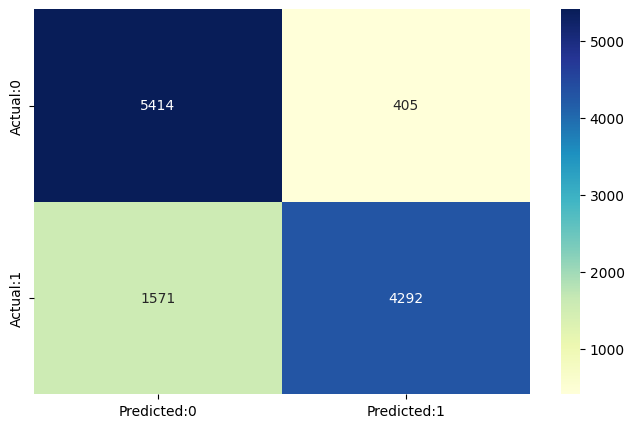

In [66]:
# Visualizing evaluation Metric Score chart
#Recall Score for train and test
train_recall_LR = recall_score(y_train, y_train_pred)
test_recall_LR = recall_score(y_test, y_test_pred)
print(f"recall for train data is {round(train_recall_LR,3)}")
print(f"recall for test data is {round(test_recall_LR,3)}")

#Printing the precision of the model
train_precision_LR = round(precision_score(y_train_pred,y_train), 3)
test_precision_LR = round(precision_score(y_test_pred,y_test), 3)
print(f"precision for train data is {round(train_precision_LR,3)}")
print(f"precision for test data is {round(test_precision_LR,3)}")


#Printing the accuracy of the model
train_accuracy_LR = accuracy_score(y_train,y_train_pred)
test_accuracy_LR = accuracy_score(y_test,y_test_pred)
print(f"accuracy for train data is {round(train_accuracy_LR,3)}")
print(f"accuracu for test data is {round(test_accuracy_LR,3)}")




#f1 score for logistic regression
f1_LR = f1_score(y_test, y_test_pred)
print(f'The f1 score is {round(f1_LR,3)}')


# ROC curve and AUC
probs_LR= LR.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_LR = probs_LR[:, 1]
# calculate AUC
auc_LR = roc_auc_score(y_test, probs_LR)
print(f"The AUC score is {auc_LR}.")


#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred))




#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix_LR=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_LR, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)

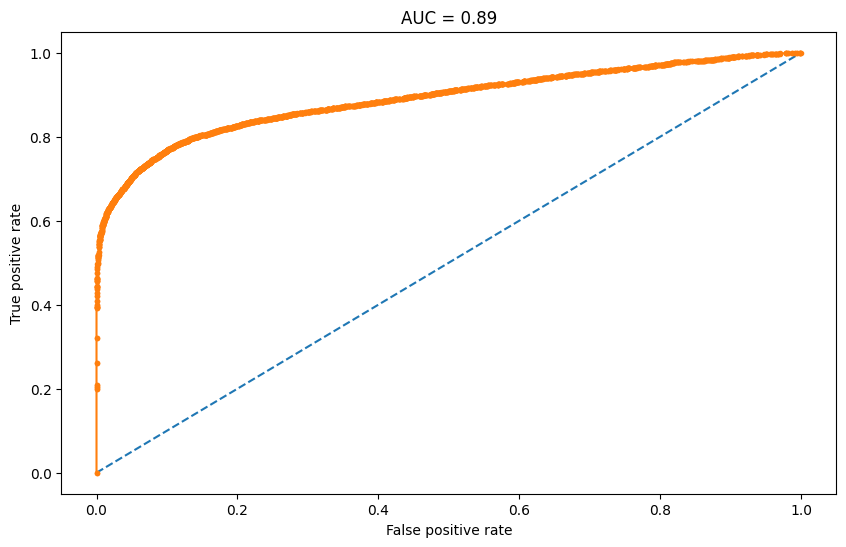

KS statistic: 0.668017076749614


In [67]:
#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_LR)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_LR,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_LR = ks_statistic(y_test, LR.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_LR)


In [68]:
# Create a dictionary to store Logistic Regression metrics
Logistic_regression_metrics = {
    'Recall_train': train_recall_LR,
    'Recall': test_recall_LR,
    'Precision_train': train_precision_LR,
    'Precision': test_precision_LR,
    'Accuracy_train': train_accuracy_LR,
    'Accuracy': test_accuracy_LR,
    'F1_score': f1_LR,
    'ROC_AUC_score': auc_LR,
    'KS_statistic': ks_LR
}

# Create a DataFrame
metric = pd.DataFrame.from_dict(Logistic_regression_metrics, orient='index').reset_index()

# Rename columns for clarity
metric = metric.rename(columns={'index': 'Metric', 0: 'Logistic_Regression'})

# Display the resulting DataFrame
metric

,Metric,Logistic_Regression
0,Recall_train,0.741272
1,Recall,0.732048
2,Precision_train,0.741000
3,Precision,0.732000
4,Accuracy_train,0.835730
5,Accuracy,0.830851
6,F1_score,0.812879
7,ROC_AUC_score,0.889516
8,KS_statistic,0.668017


Recall is 73.6%, It means that the model is capable of capturing a 73.6% of the actual defaulters.

Precision is also 73.6%

The overall accuracy of the model is around 83.3%, which means it correctly predicts the target class (default or non-default) for 83.3% of the instances in the test set.

The F1-score is a harmonic mean of precision and recall, and it provides a balance between both metrics. The F1-score of approximately 81.6% indicates that the model has a good trade-off between precision and recall.

The ROC AUC score is a measure of the area under the Receiver Operating Characteristic curve. With a value of approximately 89.1%, it shows that the model has a good ability to distinguish between positive and negative classes.

The Kolmogorov-Smirnov (KS) statistic is a metric that measures the maximum distance between the cumulative distributions of the positive and negative classes. It is useful for assessing the separation between the two classes. A KS statistic of approximately 67.5% indicates a reasonable separation between the default and non-default classes.

model can be improved as we need to have maximum recall to identify true defaulters.

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#  Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight':['balanced',None]
}
# Create a new instance of the Logistic Regression model
#LR_tuned = LogisticRegression()

# Fit the Algorithm
gs_LR= GridSearchCV(estimator=LR, param_grid=param_grid, scoring='recall', cv=5)
gs_LR.fit(x_train, y_train)

# Predict on the model
y_train_pred_gs_LR = gs_LR.predict(x_train)
y_test_pred_gs_LR = gs_LR.predict(x_test)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:")
print(gs_LR.best_params_)
print("Best Score: ", gs_LR.best_score_)

Best Hyperparameters:
{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Best Score:  0.7541842902027992


recall for train data is 0.754
recall for test data is 0.742
precision for train data is 0.754
precision for test data is 0.742
accuracy for train data is 0.833
accuracu for test data is 0.826
The f1 score is 0.811
The AUC score is 0.8895156687774647.

classification_report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      5819
           1       0.89      0.74      0.81      5863

    accuracy                           0.83     11682
   macro avg       0.84      0.83      0.82     11682
weighted avg       0.84      0.83      0.82     11682


[[5297  522]
 [1512 4351]]


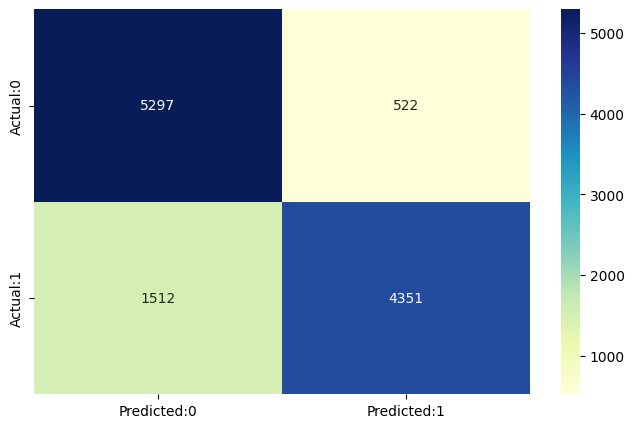

In [70]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_gs_LR = recall_score(y_train, y_train_pred_gs_LR)
test_recall_gs_LR = recall_score(y_test, y_test_pred_gs_LR)
print(f"recall for train data is {round(train_recall_gs_LR,3)}")
print(f"recall for test data is {round(test_recall_gs_LR,3)}")

#Printing the precision of the model
train_precision_gs_LR = round(precision_score(y_train_pred_gs_LR,y_train), 3)
test_precision_gs_LR = round(precision_score(y_test_pred_gs_LR,y_test), 3)
print(f"precision for train data is {round(train_precision_gs_LR,3)}")
print(f"precision for test data is {round(test_precision_gs_LR,3)}")


#Printing the accuracy of the model
train_accuracy_gs_LR = accuracy_score(y_train,y_train_pred_gs_LR)
test_accuracy_gs_LR = accuracy_score(y_test,y_test_pred_gs_LR)
print(f"accuracy for train data is {round(train_accuracy_gs_LR,3)}")
print(f"accuracu for test data is {round(test_accuracy_gs_LR,3)}")

#f1 score for logistic regression
f1_gs_LR = f1_score(y_test, y_test_pred_gs_LR)
print(f'The f1 score is {round(f1_gs_LR,3)}')
# ROC curve and AUC
probs_LR_gs= LR.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_LR_gs = probs_LR_gs[:, 1]
# calculate AUC
auc_gs_LR = roc_auc_score(y_test, probs_LR_gs)
print(f"The AUC score is {auc_gs_LR}.")

#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_gs_LR))

#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_gs_LR)
conf_matrix_gs_LR=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_gs_LR, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)

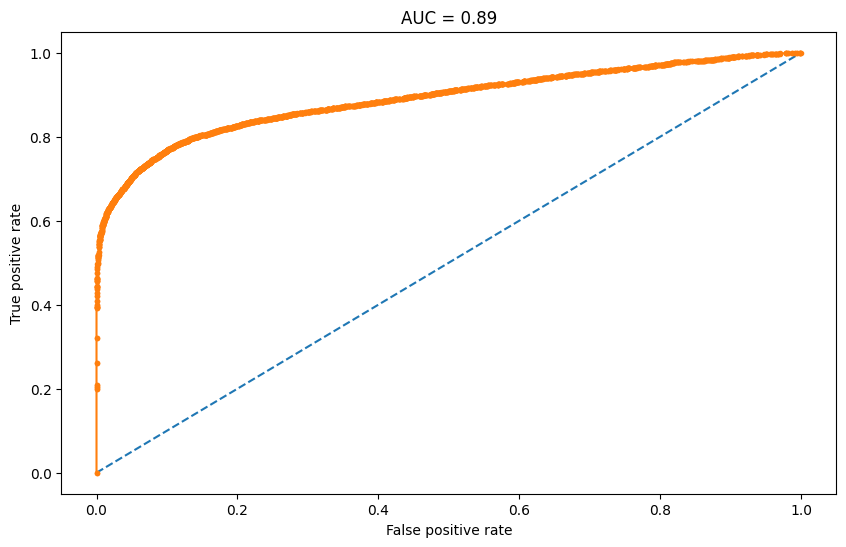

KS statistic: 0.6613226323678627


In [71]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_LR_gs)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_gs_LR,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_gs_LR(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_gs_LR = ks_statistic_gs_LR(y_test, gs_LR.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_gs_LR)

In [72]:
# Define the additional metrics for the tuned Logistic Regression model
LR_tuned_metrics = [
    train_recall_gs_LR, test_recall_gs_LR,
    train_precision_gs_LR, test_precision_gs_LR,
    train_accuracy_gs_LR, test_accuracy_gs_LR,
    f1_gs_LR, auc_gs_LR, ks_gs_LR
]

# Add a new column 'LR_Tuned' to the existing DataFrame 'metric'
metric['LR_Tuned'] = LR_tuned_metrics

# Display the updated DataFrame
metric

,Metric,Logistic_Regression,LR_Tuned
0,Recall_train,0.741272,0.754414
1,Recall,0.732048,0.742112
2,Precision_train,0.741000,0.754000
3,Precision,0.732000,0.742000
4,Accuracy_train,0.835730,0.833134
5,Accuracy,0.830851,0.825886
6,F1_score,0.812879,0.810544
7,ROC_AUC_score,0.889516,0.889516
8,KS_statistic,0.668017,0.661323


##### Which hyperparameter optimization technique have you used and why?

Answer Here.


I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

# Random Forest

Random Forest is an ensemble learning method based on decision trees. It creates multiple decision trees during training and combines their predictions to make the final prediction. Random Forest tends to be robust and can handle high-dimensional data well.

In [73]:
# ML Model - 2 Implementation
rf = RandomForestClassifier()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_train_pred_rf =rf.predict(x_train)
y_test_pred_rf =rf.predict(x_test)

recall for train data is 0.998
recall for test data is 0.83
precision for train data is 0.998
precision for test data is 0.83
accuracy for train data is 0.997
accuracu for test data is 0.866
The f1 score is 0.862
The AUC score is 0.9293477198343091.

classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5819
           1       0.90      0.83      0.86      5863

    accuracy                           0.87     11682
   macro avg       0.87      0.87      0.87     11682
weighted avg       0.87      0.87      0.87     11682


[[5255  564]
 [ 999 4864]]


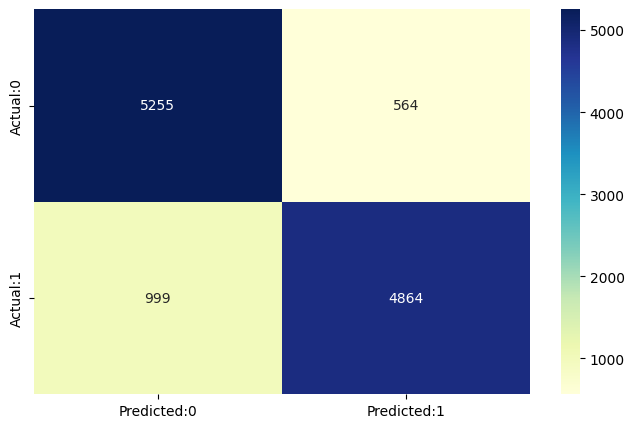

In [74]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_rf = recall_score(y_train, y_train_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
print(f"recall for train data is {round(train_recall_rf,3)}")
print(f"recall for test data is {round(test_recall_rf,3)}")

#Printing the precision of the model
train_precision_rf = round(precision_score(y_train_pred_rf,y_train), 3)
test_precision_rf = round(precision_score(y_test_pred_rf,y_test), 3)
print(f"precision for train data is {round(train_precision_rf,3)}")
print(f"precision for test data is {round(test_precision_rf,3)}")

#Printing the accuracy of the model
train_accuracy_rf = accuracy_score(y_train,y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test,y_test_pred_rf)
print(f"accuracy for train data is {round(train_accuracy_rf,3)}")
print(f"accuracu for test data is {round(test_accuracy_rf,3)}")

#f1 score for logistic regression
f1_rf = f1_score(y_test, y_test_pred_rf)
print(f'The f1 score is {round(f1_rf,3)}')

# ROC curve and AUC
probs_rf= rf.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_rf =probs_rf[:, 1]

# calculate AUC
auc_rf = roc_auc_score(y_test, probs_rf)
print(f"The AUC score is {auc_rf}.")

#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_rf))

#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_rf)
conf_matrix_rf=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_rf, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)


Random forest has great impact on the dataset compared to Logistic Regression and tuned LR. All the evaluation metrics have improved a lot from 74 to 83 % approximately.

Recall, precision and accuracy are of 99% on train data and on test data it is 83% and 87% approx, which can be said may be model is overfitting.

F1 score, auc score and ks has also increased more from the previous model.

Lets tune the hyper parameters and apply cross validation.

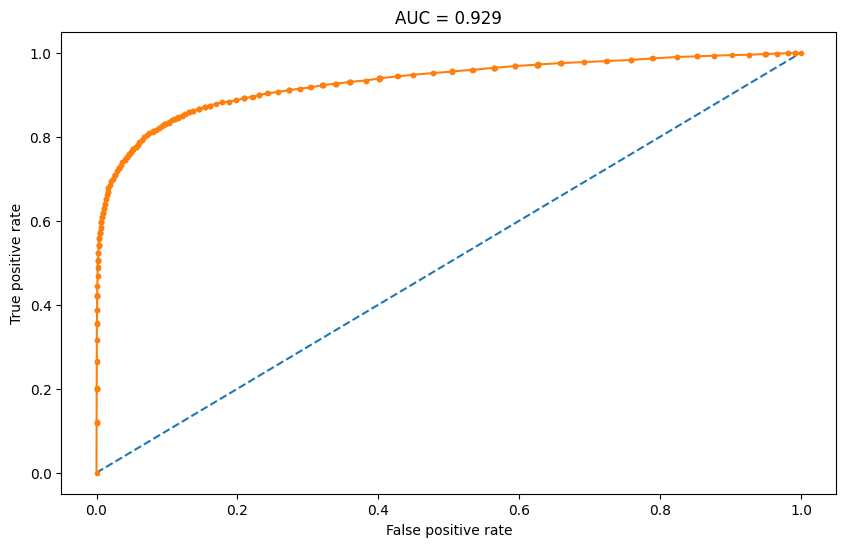

KS statistic: 0.7335367385162211


In [75]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_rf)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_rf,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_rf(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_rf = ks_statistic_rf(y_test, rf.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_rf)

In [76]:
# Define the additional metrics for the Random Forest model
random_forest_metrics = [
    train_recall_rf, test_recall_rf,
    train_precision_rf, test_precision_rf,
    train_accuracy_rf, test_accuracy_rf,
    f1_rf, auc_rf, ks_rf
]

# Add a new column 'Random_forest' to the existing DataFrame 'metric'
metric['Random_forest'] = random_forest_metrics

# Display the updated DataFrame
metric

,Metric,Logistic_Regression,LR_Tuned,Random_forest
0,Recall_train,0.741272,0.754414,0.997543
1,Recall,0.732048,0.742112,0.829609
2,Precision_train,0.741000,0.754000,0.998000
3,Precision,0.732000,0.742000,0.830000
4,Accuracy_train,0.835730,0.833134,0.996804
5,Accuracy,0.830851,0.825886,0.866204
6,F1_score,0.812879,0.810544,0.861571
7,ROC_AUC_score,0.889516,0.889516,0.929348
8,KS_statistic,0.668017,0.661323,0.733537


#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,100,200,300],
    'max_depth': [2,4,8,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [2,4,6,8,10,40,50],
    'bootstrap': [True, False]



}

# Create the RandomSearchCV object
rs_rf = RandomizedSearchCV(rf, param_grid_rf,verbose=1, cv=5, scoring='recall',n_jobs=-1)

# Fit the RandomSearchCV object to the training data
rs_rf.fit(x_train, y_train)

# Get the best estimator
best_model_rs_rf = rs_rf.best_estimator_

print("Best Hyperparameters:")
print(rs_rf.best_params_)
print("Best Score:", rs_rf.best_score_)
print(best_model_rs_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Best Score: 0.8264663320683885
RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300)


In [78]:
# Predict the model
y_train_pred_rs_rf= rs_rf.predict(x_train)
y_test_pred_rs_rf= rs_rf.predict(x_test)

recall for train data is 0.97
recall for test data is 0.826
precision for train data is 0.97
precision for test data is 0.826
accuracy for train data is 0.98
accuracu for test data is 0.865
The f1 score is 0.86
The AUC score is 0.9305321803802391.

classification_report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      5819
           1       0.90      0.83      0.86      5863

    accuracy                           0.87     11682
   macro avg       0.87      0.87      0.87     11682
weighted avg       0.87      0.87      0.87     11682


[[5267  552]
 [1022 4841]]


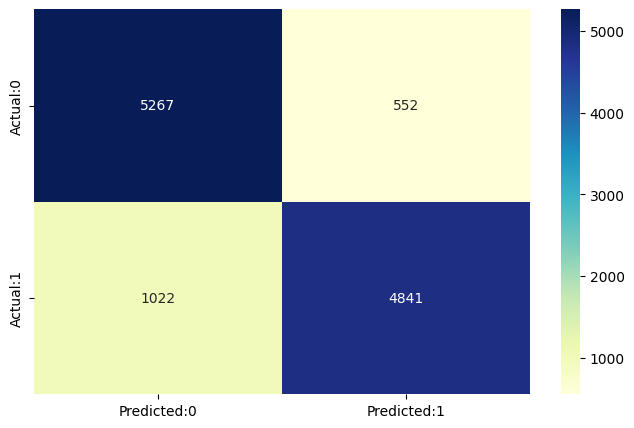

In [79]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_rs_rf = recall_score(y_train, y_train_pred_rs_rf)
test_recall_rs_rf = recall_score(y_test, y_test_pred_rs_rf)
print(f"recall for train data is {round(train_recall_rs_rf,3)}")
print(f"recall for test data is {round(test_recall_rs_rf,3)}")

#Printing the precision of the model
train_precision_rs_rf = round(precision_score(y_train_pred_rs_rf,y_train), 3)
test_precision_rs_rf = round(precision_score(y_test_pred_rs_rf,y_test), 3)
print(f"precision for train data is {round(train_precision_rs_rf,3)}")
print(f"precision for test data is {round(test_precision_rs_rf,3)}")

#Printing the accuracy of the model
train_accuracy_rs_rf = accuracy_score(y_train,y_train_pred_rs_rf)
test_accuracy_rs_rf = accuracy_score(y_test,y_test_pred_rs_rf)
print(f"accuracy for train data is {round(train_accuracy_rs_rf,3)}")
print(f"accuracu for test data is {round(test_accuracy_rs_rf,3)}")

#f1 score for logistic regression
f1_rs_rf = f1_score(y_test, y_test_pred_rs_rf)
print(f'The f1 score is {round(f1_rs_rf,3)}')

# ROC curve and AUC
probs_rf_rs= rs_rf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_rf_rs = probs_rf_rs[:, 1]
# calculate AUC
auc_rs_rf = roc_auc_score(y_test, probs_rf_rs)
print(f"The AUC score is {auc_rs_rf}.")

#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_rs_rf))

#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_rs_rf)
conf_matrix_rs_rf=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_rs_rf, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)

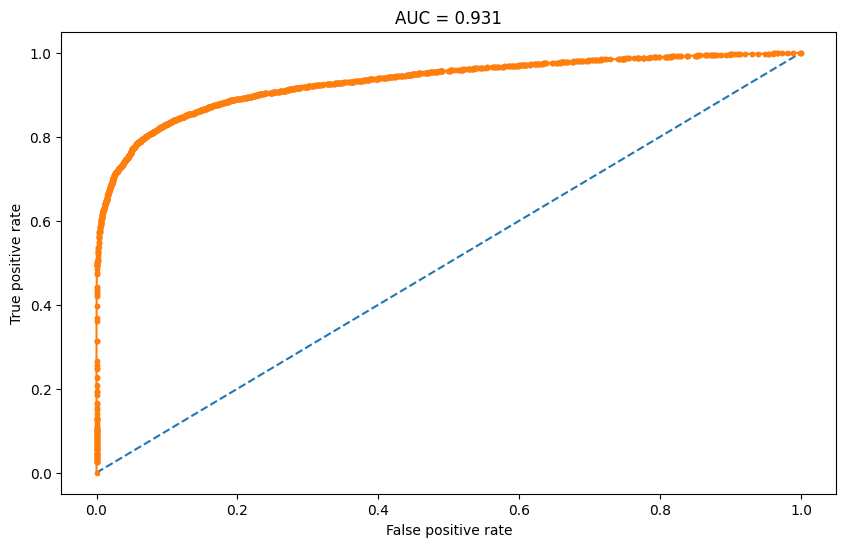

KS statistic: 0.7320523084274295


In [80]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_rf_rs)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_rs_rf,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_rs_rf(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_rs_rf = ks_statistic_rs_rf(y_test, rs_rf.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_rs_rf)

In [81]:
# Define the additional metrics for the Tuned Random Forest model
RF_tuned_metrics = [
    train_recall_rs_rf, test_recall_rs_rf,
    train_precision_rs_rf, test_precision_rs_rf,
    train_accuracy_rs_rf, test_accuracy_rs_rf,
    f1_rs_rf, auc_rs_rf, ks_rs_rf
]

# Add a new column 'RF_Tuned' to the existing DataFrame 'metric'
metric['RF_Tuned'] = RF_tuned_metrics

# Display the updated DataFrame
metric

,Metric,Logistic_Regression,LR_Tuned,Random_forest,RF_Tuned
0,Recall_train,0.741272,0.754414,0.997543,0.969773
1,Recall,0.732048,0.742112,0.829609,0.825687
2,Precision_train,0.741000,0.754000,0.998000,0.970000
3,Precision,0.732000,0.742000,0.830000,0.826000
4,Accuracy_train,0.835730,0.833134,0.996804,0.980083
5,Accuracy,0.830851,0.825886,0.866204,0.865263
6,F1_score,0.812879,0.810544,0.861571,0.860163
7,ROC_AUC_score,0.889516,0.889516,0.929348,0.930532
8,KS_statistic,0.668017,0.661323,0.733537,0.732052


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

Random Search is a hyperparameter optimization technique that randomly samples a combination of hyperparameter values from predefined ranges. It helps explore a broader hyperparameter space efficiently compared to Grid Search, especially when the search space is vast.

The choice of Random Search for hyperparameter optimization was likely made to efficiently tune the hyperparameters of the Random Forest model while still achieving reasonably good results. The trade-off here is that Random Search might not find the absolute best hyperparameters, but it can find good hyperparameters in a much shorter time compared to Grid Search, making it suitable for large datasets or complex models.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

It can be clearly seen that after tuning the hypermaters, we overcame overfitting problem. train and test results are close to each other. This indicates model is performing well on unseen data.

Also, compared to Logistic regression, tuned Random forest produced promising results of recall, precision, auc_score , F1 score and KS statistic.

### ML Model - 3

#Support Vector Machine
A Support Vector Machine (SVM) is a type of machine learning model that is commonly used for classification and regression analysis.SVM aims to find the optimal hyperplane that best separates the two classes (defaulters and non-defaulters) in our feature space. By maximizing the margin between the classes, SVM effectively handles non-linear decision boundaries and works well with high-dimensional data. It is especially useful when dealing with imbalanced datasets, like ours, as it focuses on correctly classifying positive instances (defaulters). SVM's ability to generalize well to new data makes it a valuable model for predicting credit card defaulters with high accuracy and recall.

In [82]:
# ML Model - 3 Implementation


#Defining svm object
svm = SVC(kernel='rbf',probability=True)

# Fit the Algorithm
svm.fit(x_train, y_train)

# Predict on the model
y_train_pred_svm = svm.predict(x_train)
y_test_pred_svm=svm.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

recall for train data is 0.784
recall for test data is 0.766
precision for train data is 0.784
precision for test data is 0.766
accuracy for train data is 0.851
accuracu for test data is 0.84
The f1 score is 0.828
The AUC score is 0.9008403397306025.

classification_report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5819
           1       0.90      0.77      0.83      5863

    accuracy                           0.84     11682
   macro avg       0.85      0.84      0.84     11682
weighted avg       0.85      0.84      0.84     11682


[[5319  500]
 [1370 4493]]


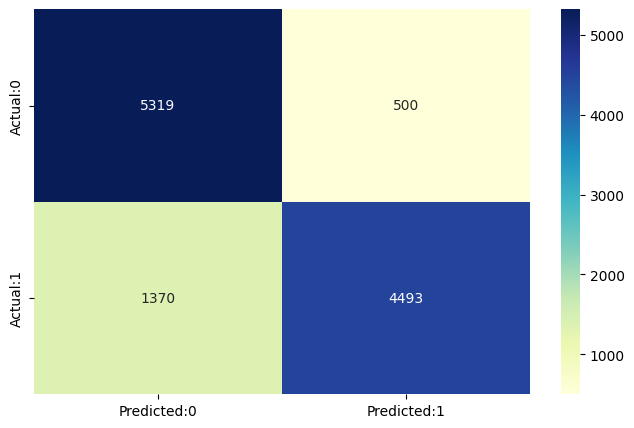

In [83]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_svm = recall_score(y_train, y_train_pred_svm)
test_recall_svm = recall_score(y_test, y_test_pred_svm)
print(f"recall for train data is {round(train_recall_svm,3)}")
print(f"recall for test data is {round(test_recall_svm,3)}")

#Printing the precision of the model
train_precision_svm = round(precision_score(y_train_pred_svm,y_train), 3)
test_precision_svm= round(precision_score(y_test_pred_svm,y_test), 3)
print(f"precision for train data is {round(train_precision_svm,3)}")
print(f"precision for test data is {round(test_precision_svm,3)}")

#Printing the accuracy of the model
train_accuracy_svm = accuracy_score(y_train,y_train_pred_svm)
test_accuracy_svm= accuracy_score(y_test,y_test_pred_svm)
print(f"accuracy for train data is {round(train_accuracy_svm,3)}")
print(f"accuracu for test data is {round(test_accuracy_svm,3)}")

#f1 score for logistic regression
f1_svm = f1_score(y_test, y_test_pred_svm)
print(f'The f1 score is {round(f1_svm,3)}')

# ROC curve and AUC
probs_svm= svm.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_svm =probs_svm[:, 1]
# calculate AUC
auc_svm = roc_auc_score(y_test, probs_svm)
print(f"The AUC score is {auc_svm}.")

#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_svm))

#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_svm)
conf_matrix_svm=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_svm, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)

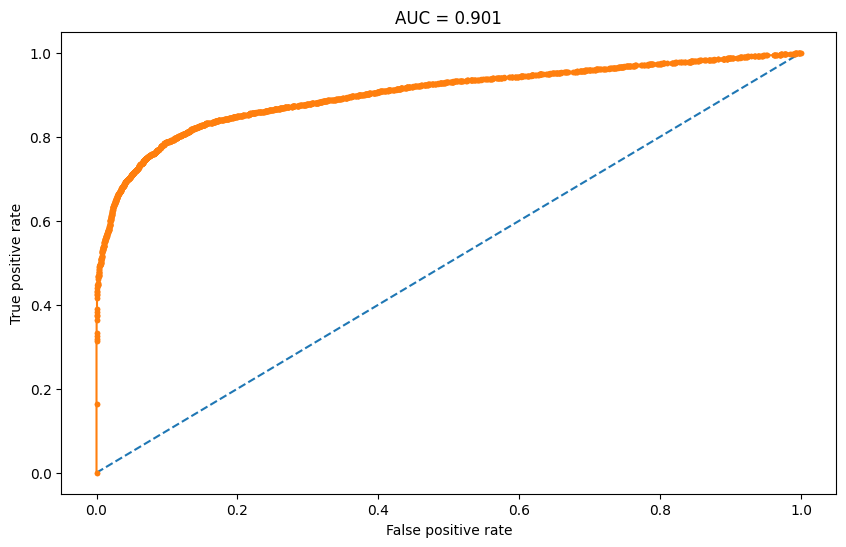

KS statistic: 0.6881755341804214


In [84]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_svm)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_svm,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_svm(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_svm = ks_statistic_svm(y_test, svm.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_svm)

In [85]:
# Define the additional metrics for the Tuned Random Forest model
RF_tuned_metrics = [
    train_recall_rs_rf, test_recall_rs_rf,
    train_precision_rs_rf, test_precision_rs_rf,
    train_accuracy_rs_rf, test_accuracy_rs_rf,
    f1_rs_rf, auc_rs_rf, ks_rs_rf
]

# Add a new column 'RF_Tuned' to the existing DataFrame 'metric'
metric['RF_Tuned'] = RF_tuned_metrics

# Display the updated DataFrame
metric

,Metric,Logistic_Regression,LR_Tuned,Random_forest,RF_Tuned
0,Recall_train,0.741272,0.754414,0.997543,0.969773
1,Recall,0.732048,0.742112,0.829609,0.825687
2,Precision_train,0.741000,0.754000,0.998000,0.970000
3,Precision,0.732000,0.742000,0.830000,0.826000
4,Accuracy_train,0.835730,0.833134,0.996804,0.980083
5,Accuracy,0.830851,0.825886,0.866204,0.865263
6,F1_score,0.812879,0.810544,0.861571,0.860163
7,ROC_AUC_score,0.889516,0.889516,0.929348,0.930532
8,KS_statistic,0.668017,0.661323,0.733537,0.732052


#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
Cs = [ 0.1, 1, 10]
gammas = [0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = RandomizedSearchCV(svm, param_grid, cv=2,verbose=1,n_jobs=-1)

# Fit the Algorithm
svm_clf.fit(x_train,y_train)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'gamma': [0.1, 1]},
                   verbose=1)

In [87]:
print("Best Hyperparameters:")
print(svm_clf.best_params_)
print("Best Score:", svm_clf.best_score_)

Best Hyperparameters:
{'gamma': 0.1, 'C': 1}
Best Score: 0.8458026593619814


In [88]:
# predictions
y_train_pred_svm_clf = svm_clf.predict(x_train)
y_test_pred_svm_clf = svm_clf.predict(x_test)

recall for train data is 0.799
recall for test data is 0.774
precision for train data is 0.799
precision for test data is 0.774
accuracy for train data is 0.862
accuracu for test data is 0.844
The f1 score is 0.833
The AUC score is 0.9044449131611036.

classification_report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5819
           1       0.90      0.77      0.83      5863

    accuracy                           0.84     11682
   macro avg       0.85      0.84      0.84     11682
weighted avg       0.85      0.84      0.84     11682


[[5318  501]
 [1325 4538]]


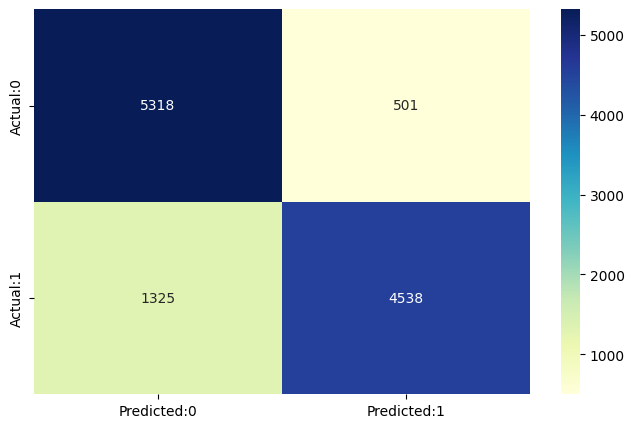

In [89]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_svm_clf = recall_score(y_train, y_train_pred_svm_clf)
test_recall_svm_clf = recall_score(y_test, y_test_pred_svm_clf)
print(f"recall for train data is {round(train_recall_svm_clf,3)}")
print(f"recall for test data is {round(test_recall_svm_clf,3)}")

#Printing the precision of the model
train_precision_svm_clf = round(precision_score(y_train_pred_svm_clf,y_train), 3)
test_precision_svm_clf = round(precision_score(y_test_pred_svm_clf,y_test), 3)
print(f"precision for train data is {round(train_precision_svm_clf,3)}")
print(f"precision for test data is {round(test_precision_svm_clf,3)}")

#Printing the accuracy of the model
train_accuracy_svm_clf = accuracy_score(y_train,y_train_pred_svm_clf)
test_accuracy_svm_clf = accuracy_score(y_test,y_test_pred_svm_clf)
print(f"accuracy for train data is {round(train_accuracy_svm_clf,3)}")
print(f"accuracu for test data is {round(test_accuracy_svm_clf,3)}")

#f1 score for logistic regression
f1_svm_clf = f1_score(y_test, y_test_pred_svm_clf)
print(f'The f1 score is {round(f1_svm_clf,3)}')
# ROC curve and AUC
probs_svm_clf= svm_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_svm_clf = probs_svm_clf[:, 1]
# calculate AUC
auc_svm_clf = roc_auc_score(y_test, probs_svm_clf)
print(f"The AUC score is {auc_svm_clf}.")

#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_svm_clf))

#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_svm_clf)
conf_matrix_svm_clf=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_svm_clf, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)

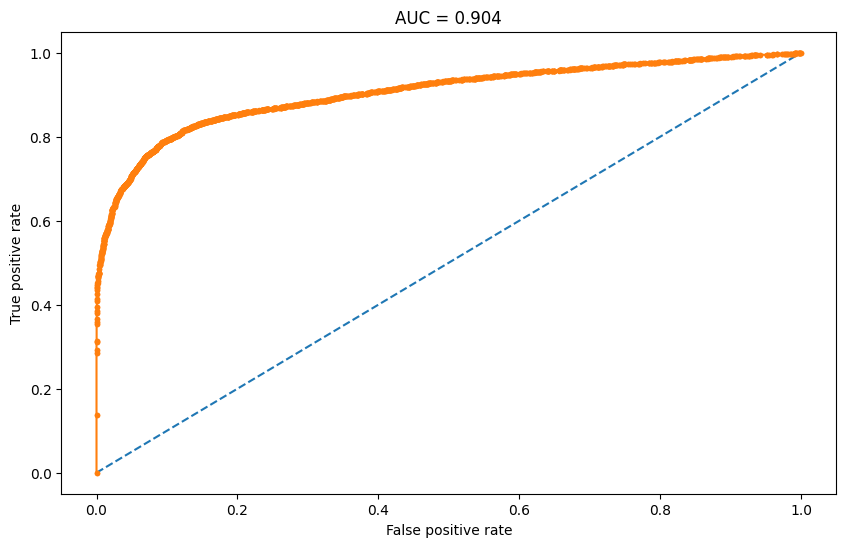

KS statistic: 0.6934900131451378


In [90]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_svm_clf)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_svm_clf,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_svm_clf(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_svm_clf = ks_statistic_svm_clf(y_test, svm_clf.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_svm_clf)

In [91]:
# Define the additional metrics for the Tuned SVM model
SVM_tuned_metrics = [
    train_recall_svm_clf, test_recall_svm_clf,
    train_precision_svm_clf, test_precision_svm_clf,
    train_accuracy_svm_clf, test_accuracy_svm_clf,
    f1_svm_clf, auc_svm_clf, ks_svm_clf
]

# Add a new column 'SVM_Tuned' to the existing DataFrame 'metric'
metric['SVM_Tuned'] = SVM_tuned_metrics

metric

,Metric,Logistic_Regression,LR_Tuned,Random_forest,RF_Tuned,SVM_Tuned
0,Recall_train,0.741272,0.754414,0.997543,0.969773,0.799211
1,Recall,0.732048,0.742112,0.829609,0.825687,0.774006
2,Precision_train,0.741000,0.754000,0.998000,0.970000,0.799000
3,Precision,0.732000,0.742000,0.830000,0.826000,0.774000
4,Accuracy_train,0.835730,0.833134,0.996804,0.980083,0.862466
5,Accuracy,0.830851,0.825886,0.866204,0.865263,0.843691
6,F1_score,0.812879,0.810544,0.861571,0.860163,0.832508
7,ROC_AUC_score,0.889516,0.889516,0.929348,0.930532,0.904445
8,KS_statistic,0.668017,0.661323,0.733537,0.732052,0.693490


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

In GridSearchCV,cross-validation is also performed which is used while training the model.

# MODEL 4

XGBoost

XGBoost (eXtreme Gradient Boosting) is a powerful ensemble learning algorithm widely used for classification tasks, including predicting credit card defaulters. It works by combining multiple weak learners (decision trees) and boosting their performance iteratively. XGBoost optimizes a loss function and uses gradient boosting techniques to minimize errors and improve accuracy. Its ability to handle missing data, regularization, and feature importance analysis makes it suitable for credit risk prediction.

In [92]:
xgb = XGBClassifier()

# Fit the Algorithm
xgb.fit(x_train,y_train)

# Predict on the model
y_train_pred_xgb =xgb.predict(x_train)
y_test_pred_xgb =xgb.predict(x_test)

recall for train data is 0.874
recall for test data is 0.798
precision for train data is 0.959
precision for test data is 0.902
accuracy for train data is 0.919
accuracy for test data is 0.855
The f1 score is 0.847
The AUC score is 0.919268505774443.

classification_report
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      5819
           1       0.90      0.80      0.85      5863

    accuracy                           0.86     11682
   macro avg       0.86      0.86      0.85     11682
weighted avg       0.86      0.86      0.85     11682


[[5312  507]
 [1185 4678]]


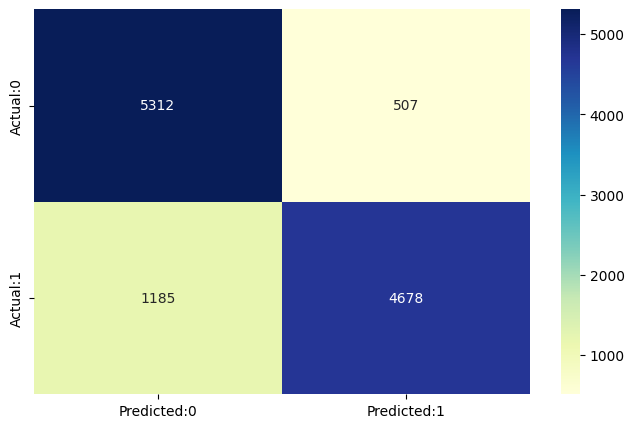

In [93]:
# Visualizing evaluation Metric Score chart
#Recall Score for train and test
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)
print(f"recall for train data is {round(train_recall_xgb, 3)}")
print(f"recall for test data is {round(test_recall_xgb, 3)}")

#Printing the precision of the model
train_precision_xgb = round(precision_score(y_train, y_train_pred_xgb), 3)
test_precision_xgb = round(precision_score(y_test, y_test_pred_xgb), 3)
print(f"precision for train data is {round(train_precision_xgb, 3)}")
print(f"precision for test data is {round(test_precision_xgb, 3)}")

#Printing the accuracy of the model
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"accuracy for train data is {round(train_accuracy_xgb, 3)}")
print(f"accuracy for test data is {round(test_accuracy_xgb, 3)}")

#f1 score for XGBoost
f1_xgb = f1_score(y_test, y_test_pred_xgb)
print(f'The f1 score is {round(f1_xgb, 3)}')

# ROC curve and AUC
probs_xgb = xgb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_xgb = probs_xgb[:, 1]

# calculate AUC
auc_xgb = roc_auc_score(y_test, probs_xgb)
print(f"The AUC score is {auc_xgb}.")

#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test, y_test_pred_xgb))

#Plotting the Confusion Matrix
cm= confusion_matrix(y_test, y_test_pred_xgb)
conf_matrix_xgb = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="YlGnBu")

print()
print(cm)

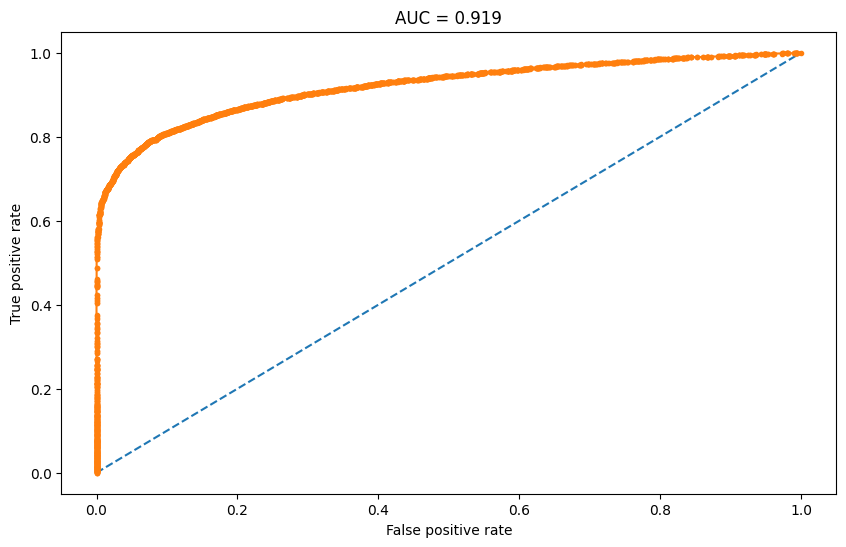

KS statistic: 0.7139054407715941


In [94]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_xgb)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_xgb,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_xgb(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_xgb = ks_statistic_xgb(y_test, xgb.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_xgb)

In [95]:
# Define the additional metrics for the XGB model
xgb_metrics = [
    train_recall_xgb, test_recall_xgb,
    train_precision_xgb, test_precision_xgb,
    train_accuracy_xgb, test_accuracy_xgb,
    f1_xgb, auc_xgb, ks_xgb
]

# Add a new column 'XGB' to the existing DataFrame 'metric'
metric['XGB'] = xgb_metrics

# Display the updated DataFrame
metric

,Metric,Logistic_Regression,LR_Tuned,Random_forest,RF_Tuned,SVM_Tuned,XGB
0,Recall_train,0.741272,0.754414,0.997543,0.969773,0.799211,0.874236
1,Recall,0.732048,0.742112,0.829609,0.825687,0.774006,0.797885
2,Precision_train,0.741000,0.754000,0.998000,0.970000,0.799000,0.959000
3,Precision,0.732000,0.742000,0.830000,0.826000,0.774000,0.902000
4,Accuracy_train,0.835730,0.833134,0.996804,0.980083,0.862466,0.918678
5,Accuracy,0.830851,0.825886,0.866204,0.865263,0.843691,0.855162
6,F1_score,0.812879,0.810544,0.861571,0.860163,0.832508,0.846850
7,ROC_AUC_score,0.889516,0.889516,0.929348,0.930532,0.904445,0.919269
8,KS_statistic,0.668017,0.661323,0.733537,0.732052,0.693490,0.713905


# Cross Validation and Hyperparameter tuning

In [96]:
# Define the parameter grid for hyperparameter tuning
param_grid_xg = {
    'n_estimators': [100,200,250],
    'max_depth': [15,20,25],
    'gamma': [0.3, 0.2, 0.1],
    'learning_rate': [0.15, 0.1, 0.05],
    'colsample_bytree':[0.3,0.6],
    'subsample': [0.7, 0.8, 0.9]


}




# Create the GridSearchCV object
xgb_clf = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xg, cv=3, scoring='recall',verbose=1,n_jobs=-1)

# Fit the GridSearchCV object to the training data
xgb_clf.fit(x_train, y_train)

# Get the best estimator
best_model_xgb_clf = xgb_clf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [97]:
# Predict on the model

y_train_pred_xgb_clf= xgb_clf.predict(x_train)
y_test_pred_xgb_clf= xgb_clf.predict(x_test)

In [98]:
xgb_clf.best_params_

{'subsample': 0.7,
 'n_estimators': 250,
 'max_depth': 20,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

recall for train data is 0.982
recall for test data is 0.822
precision for train data is 0.982
precision for test data is 0.822
accuracy for train data is 0.987
accuracu for test data is 0.862
The f1 score is 0.857
The AUC score is 0.9292616918288081.

classification_report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      5819
           1       0.89      0.82      0.86      5863

    accuracy                           0.86     11682
   macro avg       0.86      0.86      0.86     11682
weighted avg       0.86      0.86      0.86     11682


[[5252  567]
 [1043 4820]]


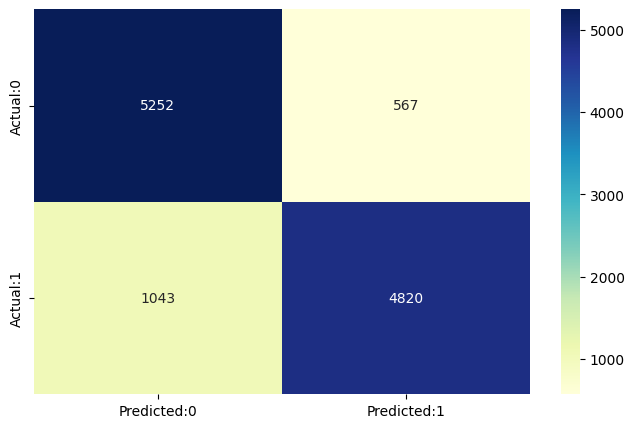

In [99]:
# Visualizing evaluation Metric Score chart

#Recall Score for train and test
train_recall_xgb_clf = recall_score(y_train, y_train_pred_xgb_clf)
test_recall_xgb_clf = recall_score(y_test, y_test_pred_xgb_clf)
print(f"recall for train data is {round(train_recall_xgb_clf,3)}")
print(f"recall for test data is {round(test_recall_xgb_clf,3)}")

#Printing the precision of the model
train_precision_xgb_clf = round(precision_score(y_train_pred_xgb_clf,y_train), 3)
test_precision_xgb_clf = round(precision_score(y_test_pred_xgb_clf,y_test), 3)
print(f"precision for train data is {round(train_precision_xgb_clf,3)}")
print(f"precision for test data is {round(test_precision_xgb_clf,3)}")


#Printing the accuracy of the model
train_accuracy_xgb_clf = accuracy_score(y_train,y_train_pred_xgb_clf)
test_accuracy_xgb_clf = accuracy_score(y_test,y_test_pred_xgb_clf)
print(f"accuracy for train data is {round(train_accuracy_xgb_clf,3)}")
print(f"accuracu for test data is {round(test_accuracy_xgb_clf,3)}")




#f1 score for logistic regression
f1_xgb_clf = f1_score(y_test, y_test_pred_xgb_clf)
print(f'The f1 score is {round(f1_xgb_clf,3)}')


# ROC curve and AUC
probs_xgb_clf= xgb_clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_xgb_clf = probs_xgb_clf[:, 1]

# calculate AUC
auc_xgb_clf = roc_auc_score(y_test, probs_xgb_clf)
print(f"The AUC score is {auc_xgb_clf}.")


#Displaying the Classification Report
print()
print("classification_report")
print(classification_report(y_test,y_test_pred_xgb_clf))




#Plotting the Confusion Matrix
cm=confusion_matrix(y_test,y_test_pred_xgb_clf)
conf_matrix_xgb_clf=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_xgb_clf, annot=True,fmt='d',cmap="YlGnBu")

print()
print(cm)

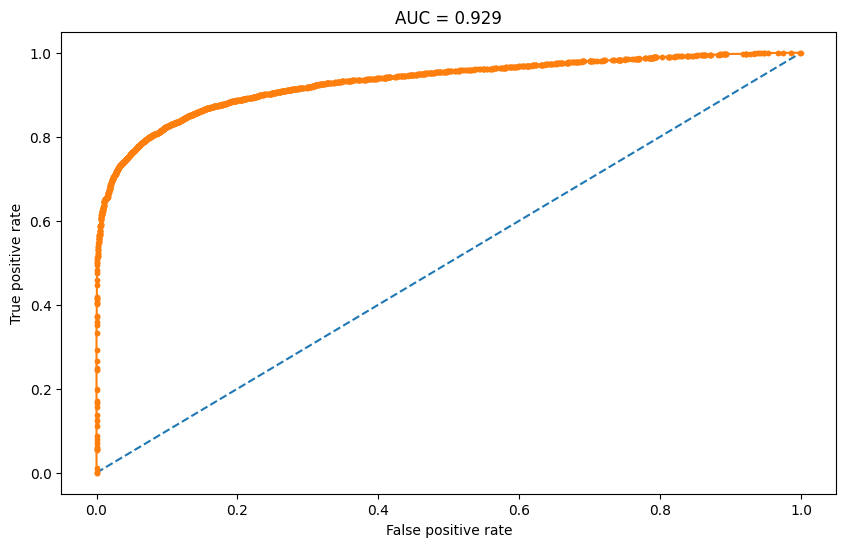

KS statistic: 0.7252943469458754


In [100]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs_xgb_clf)
# plot curve

plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_xgb_clf,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_xgb_clf(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_xgb_clf = ks_statistic_xgb_clf(y_test, xgb_clf.predict_proba(x_test)[:, 1])

print("KS statistic:", ks_xgb_clf)

In [101]:
# Define the additional metrics for the Tuned XGB model
XGB_tuned_metrics = [
    train_recall_xgb_clf, test_recall_xgb_clf,
    train_precision_xgb_clf, test_precision_xgb_clf,
    train_accuracy_xgb_clf, test_accuracy_xgb_clf,
    f1_xgb_clf, auc_xgb_clf, ks_xgb_clf
]

# Add a new column 'XGB_Tuned' to the existing DataFrame 'metric'
metric['XGB_Tuned'] = XGB_tuned_metrics

# Display the updated DataFrame
metric

,Metric,Logistic_Regression,LR_Tuned,Random_forest,RF_Tuned,SVM_Tuned,XGB,XGB_Tuned
0,Recall_train,0.741272,0.754414,0.997543,0.969773,0.799211,0.874236,0.982115
1,Recall,0.732048,0.742112,0.829609,0.825687,0.774006,0.797885,0.822105
2,Precision_train,0.741000,0.754000,0.998000,0.970000,0.799000,0.959000,0.982000
3,Precision,0.732000,0.742000,0.830000,0.826000,0.774000,0.902000,0.822000
4,Accuracy_train,0.835730,0.833134,0.996804,0.980083,0.862466,0.918678,0.986561
5,Accuracy,0.830851,0.825886,0.866204,0.865263,0.843691,0.855162,0.862181
6,F1_score,0.812879,0.810544,0.861571,0.860163,0.832508,0.846850,0.856889
7,ROC_AUC_score,0.889516,0.889516,0.929348,0.930532,0.904445,0.919269,0.929262
8,KS_statistic,0.668017,0.661323,0.733537,0.732052,0.693490,0.713905,0.725294


1. Which Evaluation metrics did you consider for a positive business impact and why?

1.Recall (Sensitivity, True Positive Rate):

Recall measures the proportion of actual positive cases (defaulters in this case) that are correctly identified by the model.

In the context of credit card default prediction, recall is crucial because it indicates the ability of the model to correctly identify customers who are likely to default on their credit card payments. High recall means the model is good at catching defaulters. That is the main business objective of this project.


2.F1 Score: F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric that considers both aspects of model performance.

The F1 score is useful when you want to find a balance between precision and recall. It is especially relevant when the cost of false positives and false negatives is significant and should be minimized equally.


3.KS Statistic:The Kolmogorov-Smirnov (KS) statistic represents the maximum difference between the cumulative distributions of predicted probabilities for the positive and negative classes.

KS statistic is a powerful metric for evaluating the separation between the predicted probabilities of defaulters and non-defaulters. A higher KS score means the model can better differentiate between these two classes. It is particularly useful in credit risk assessment, where accurate ranking of customers based on their likelihood of defaulting is essential for the business to optimize risk management strategies.

2. Which ML model did you choose from the above created models as your final prediction model and why?

I finalized Tuned Random forest Model to be my best model based on the evaluation metrics recall, F1 score, KS statistic.

Even though XGB tuned model is giving high recall, f1 score and Ks, by observing the metrics on train data and test data, the model is likely overfitting. There is too much difference in train and test, model is almost learning everything from train data. For this reason, i disregard this model.

Tuned Random forest is performing well on the chosen metrics than remaining models Logistic Regression and SVM.

#Future Work (Optional)

1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [102]:
# Save the File

2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [103]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

* The main goal of the project was to create a machine learning model that predicts credit card payment defaults for the next month. After performing data visualization, I identified several important features related to defaulters. During feature engineering, I added a new feature representing the average bill amount over the past six months and removed individual variables. Additionally, since the data was heavily imbalanced, I applied the SMOTE technique to balance the dataset.

* Four models were developed and evaluated: Logistic Regression, Random Forest, SVM, and XGBoost Classifier. The evaluation metrics used were recall, f1 score, and KS statistic, focusing on the objective of predicting defaulters rather than simply classifying defaulters and non-defaulters.

* The optimized (tuned) Random Forest Classifier model showed promising results with a recall of 83%, f1 score of 86%, and KS statistic of 74%. These results were consistent on both the train and test datasets. However, the tuned XGBoost model exhibited overfitting, while SVM and Logistic Regression yielded lower scores compared to Random Forest. XGBoost performed well in all evaluation metrics except for recall, where it achieved a score of approximately 79%.

* The important features that played a crucial role in prediction were identified as 'LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'SEX_Female', 'SEX_Male', 'EDUCATION_Graduation', 'EDUCATION_High_School', 'EDUCATION_University', 'MARRIAGE_Married', 'MARRIAGE_Single', and 'AVG_BILL_AMT'.

* It is worth noting that if we had access to additional information such as customer income or annual spending, it could have greatly improved our model's ability to estimate whether a customer defaults or not.

* Based on the evaluation and considering the business objective, the final model chosen is the tuned Random Forest model due to its high recall. However, if the business places a higher emphasis on precision and minimizing the misclassification of non-defaulters as defaulters, I would recommend the XGBoost model, which demonstrated high precision and f1 score. Given the dataset and features at hand, our model performs well on all data points. With such high recall, we can confidently deploy this model for further predictive tasks using future data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***